# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import pickle as pkl

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 26
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'Tahoma'
import seaborn as sns

# 2. load data for visualize

In [2]:
# Dataframe
data = pd.read_csv('Sample 14days_food_delivery_Cleaned.csv')

# Model prediction result (lr, rf, xgb)
model_pred_result_s = pd.read_csv('Food_delivery_model_prediction_result_s.csv')
model_pred_result_m = pd.read_csv('Food_delivery_model_prediction_result_m.csv')

# Model metrics (lr, rf, xgb)
model_metrcis_s = pd.read_csv('Food_delivery_model_metrics_s.csv')
model_metrcis_m = pd.read_csv('Food_delivery_model_metrics_m.csv')

# grid search metrics for hyperparameter tuning result
CV_metrics_s = pd.read_csv('Food_delivery_CV_metrics_s.csv')
CV_metrics_m = pd.read_csv('Food_delivery_CV_metrics_m.csv')

# Best model prediction result
model_best_pred_result_s = pd.read_csv('Food_delivery_best_model_prediction_result_s.csv')
model_best_pred_result_m = pd.read_csv('Food_delivery_best_model_prediction_result_m.csv')

# Best model metrics
model_best_metrcis_s = pd.read_csv('Food_delivery_best_model_metrics_s.csv')
model_best_metrcis_m = pd.read_csv('Food_delivery_best_model_metrics_m.csv')

In [3]:
model_pred_result_m

ym_test  lr_predictions_m  rf_predictions_m  gbdt_predictions_m
0     43.150000         42.750421         45.651250           42.391091
1     13.966667         16.627008         18.874417           18.357028
2      4.316667          8.254748          6.277167            6.516412
3     33.150000         33.033401         36.109874           34.564875
4      3.666667          7.170925          5.455500            6.588642
...         ...               ...               ...                 ...
3995   4.633333          6.679413          6.350333            6.525425
3996   5.150000          7.343812          6.271500            6.573331
3997  21.333333         24.998385         27.142594           26.111749
3998  38.000000         35.174529         31.382528           34.894640
3999  30.983333         28.384280         27.334083           27.624975

[4000 rows x 4 columns]

# 3. Visualize

## 3.1 model actual-prediction plot

In [4]:
def scatter_actual_predict(data, X, y, title='Actual vs Predicted'):
    plt.plot([data[X].min(), data[X].max()], [data[X].min(), data[X].max()], 'k--', lw=2)
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    sns.scatterplot(x=X, y=y, data=data)
    plt.show()

In [5]:
def scatter_actual_predict_subplots(data, X, ys, titles=None):
    plt.figure(figsize=(16*len(ys), 15))
    for i in range(len(ys)):
        y = ys[i]
        if titles is None:
            title = y
        else:
            title = titles[i]
        plt.subplot(1, len(ys), i+1)
        plt.plot([data[X].min(), data[X].max()], [data[X].min(), data[X].max()], 'k--', lw=2)
        plt.title(title)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        sns.scatterplot(x=X, y=y, data=data)
    plt.show()

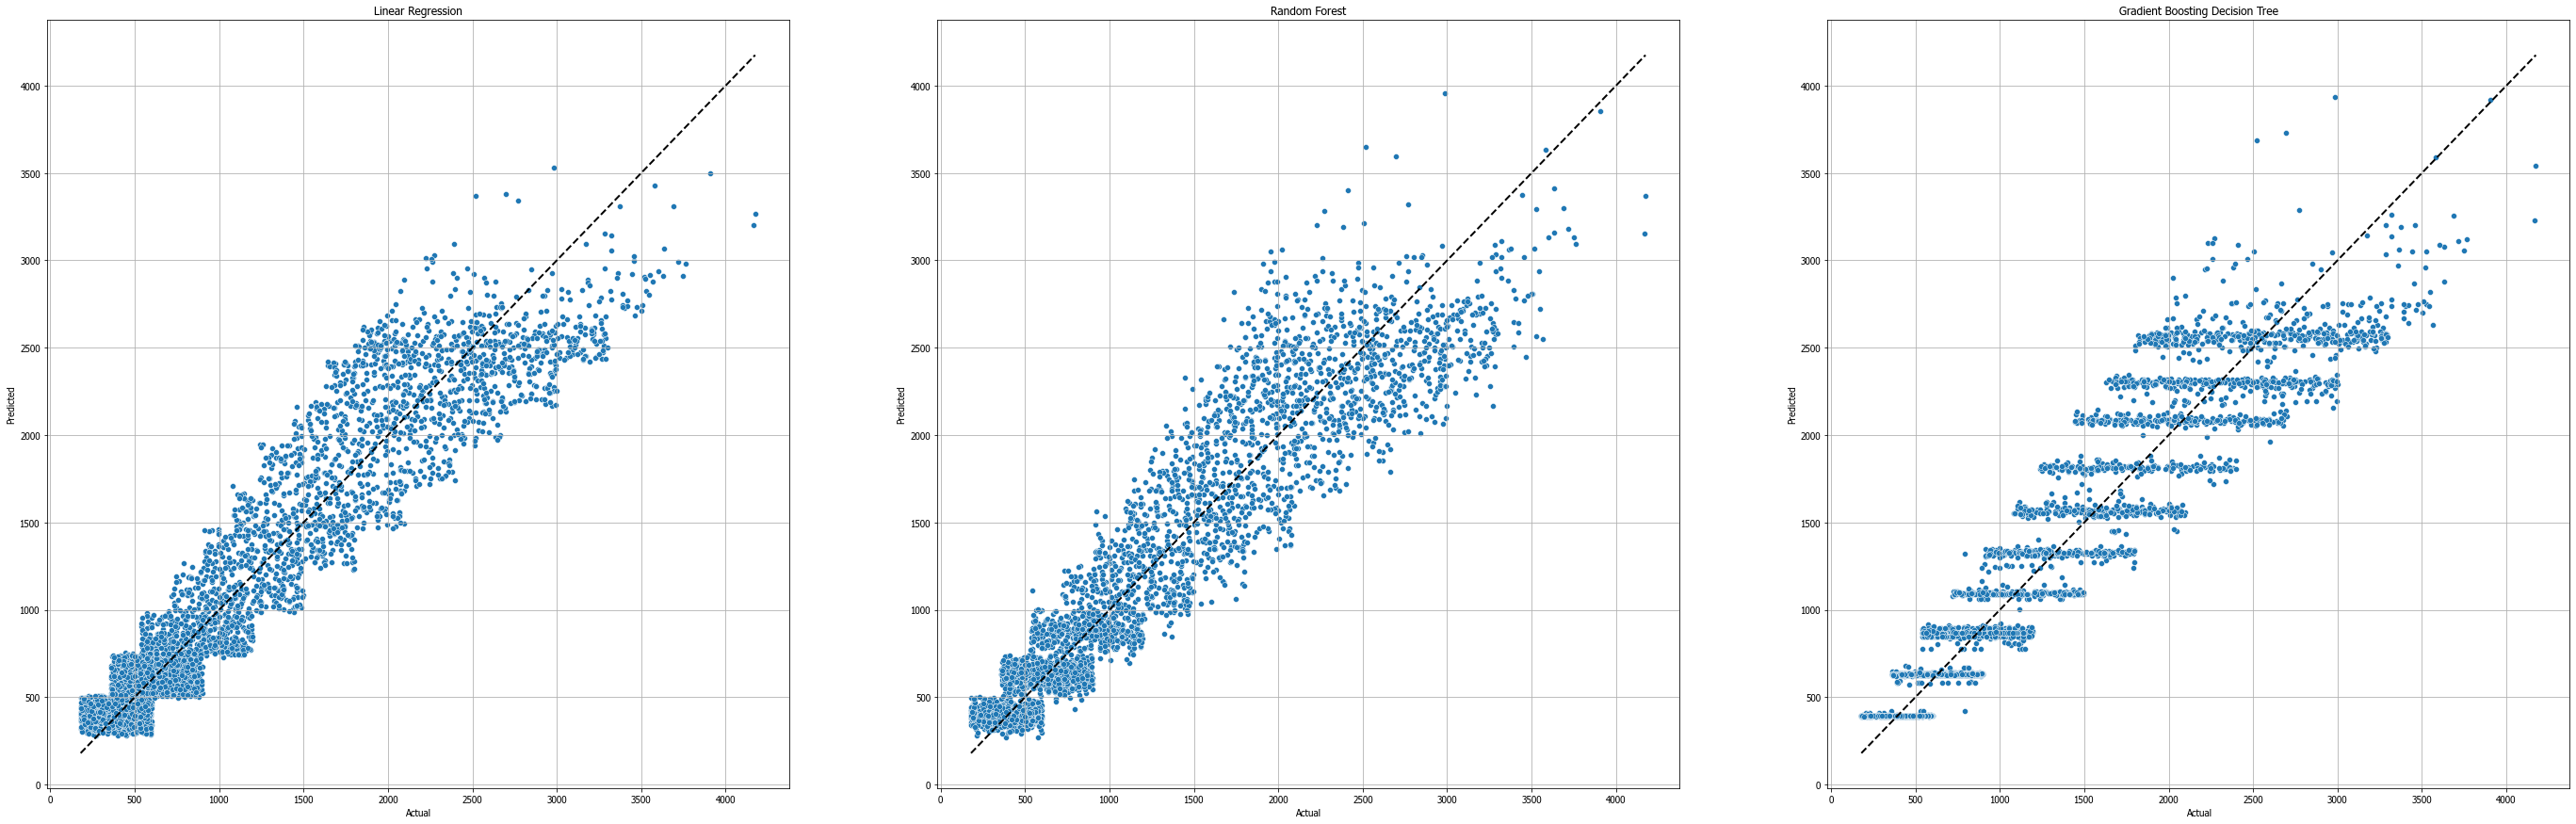

In [6]:
scatter_actual_predict_subplots(
    data=model_pred_result_s,
    X='ys_test',
    ys=['lr_predictions_s', 'rf_predictions_s', 'gbdt_predictions_s'],
    titles=['Linear Regression', 'Random Forest', 'Gradient Boosting Decision Tree'])

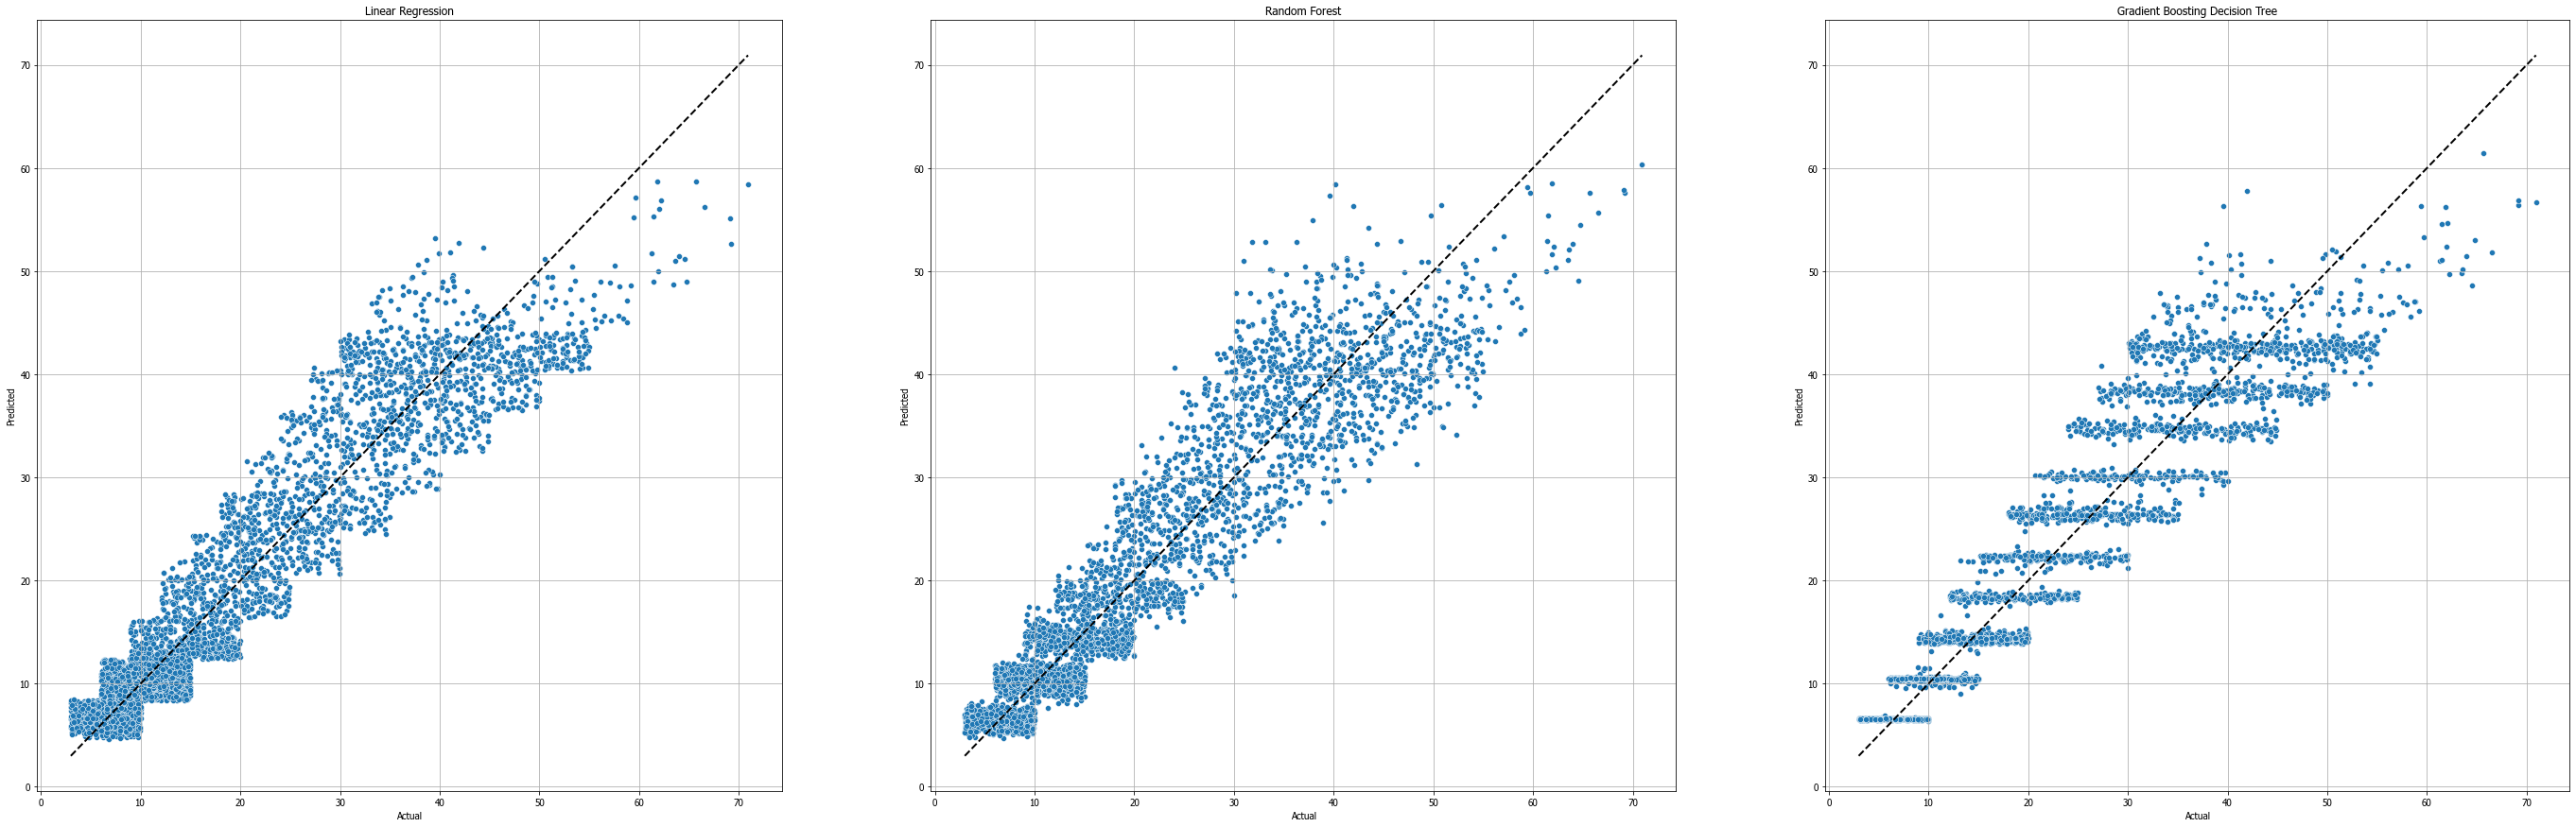

In [7]:
scatter_actual_predict_subplots(
    data=model_pred_result_m,
    X='ym_test',
    ys=['lr_predictions_m', 'rf_predictions_m', 'gbdt_predictions_m'],
    titles=['Linear Regression', 'Random Forest', 'Gradient Boosting Decision Tree'])

## 3.2 model actual-proportion plot

In [8]:
def scatter_actual_proportion(data, X, y, title='Actual vs Predicted'):
    data['prop'] = data[y] / data[X] # predicted / actual
    plt.hlines(1, data[X].min(), data[X].max(), colors='black' , linestyles='dashed', lw=2)
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted/Actual')
    sns.scatterplot(x=X, y='prop', data=data)
    plt.show()

In [9]:
def scatter_actual_proportion_subplots(data, X, ys, titles=None):
    plt.figure(figsize=(16*len(ys), 15))
    for i in range(len(ys)):
        y = ys[i]
        if titles is None:
            title = y
        else:
            title = titles[i]
        plt.subplot(1, len(ys), i+1)
        data['prop'] = data[y] / data[X] # predicted / actual
        plt.hlines(1, data[X].min(), data[X].max(), colors='black' , linestyles='dashed', lw=2)
        plt.title(title)
        plt.xlabel('Actual')
        plt.ylabel('Predicted/Actual')
        sns.scatterplot(x=X, y='prop', data=data)
        
    plt.show()

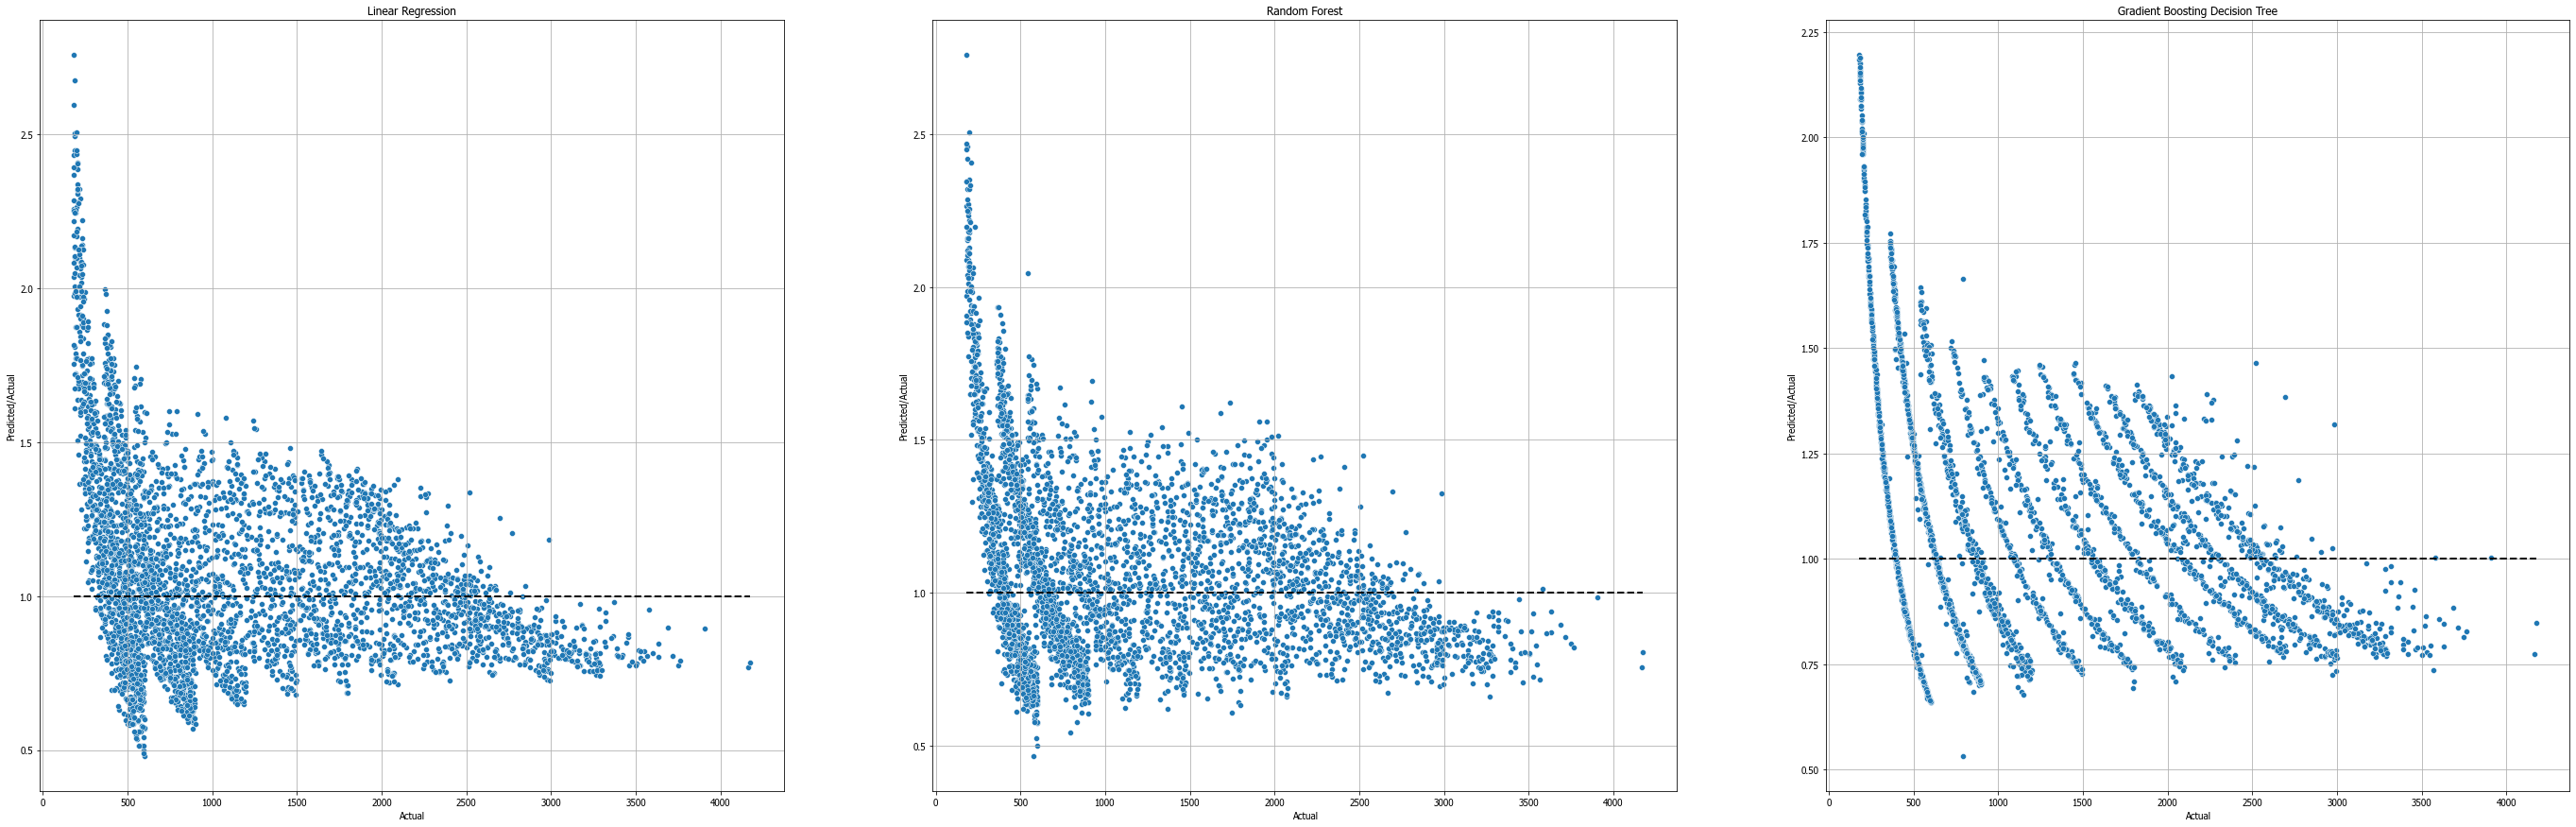

In [10]:
scatter_actual_proportion_subplots(
    data = model_pred_result_s,
    X = 'ys_test', 
    ys = ['lr_predictions_s', 'rf_predictions_s', 'gbdt_predictions_s'],
    titles=['Linear Regression', 'Random Forest', 'Gradient Boosting Decision Tree'])

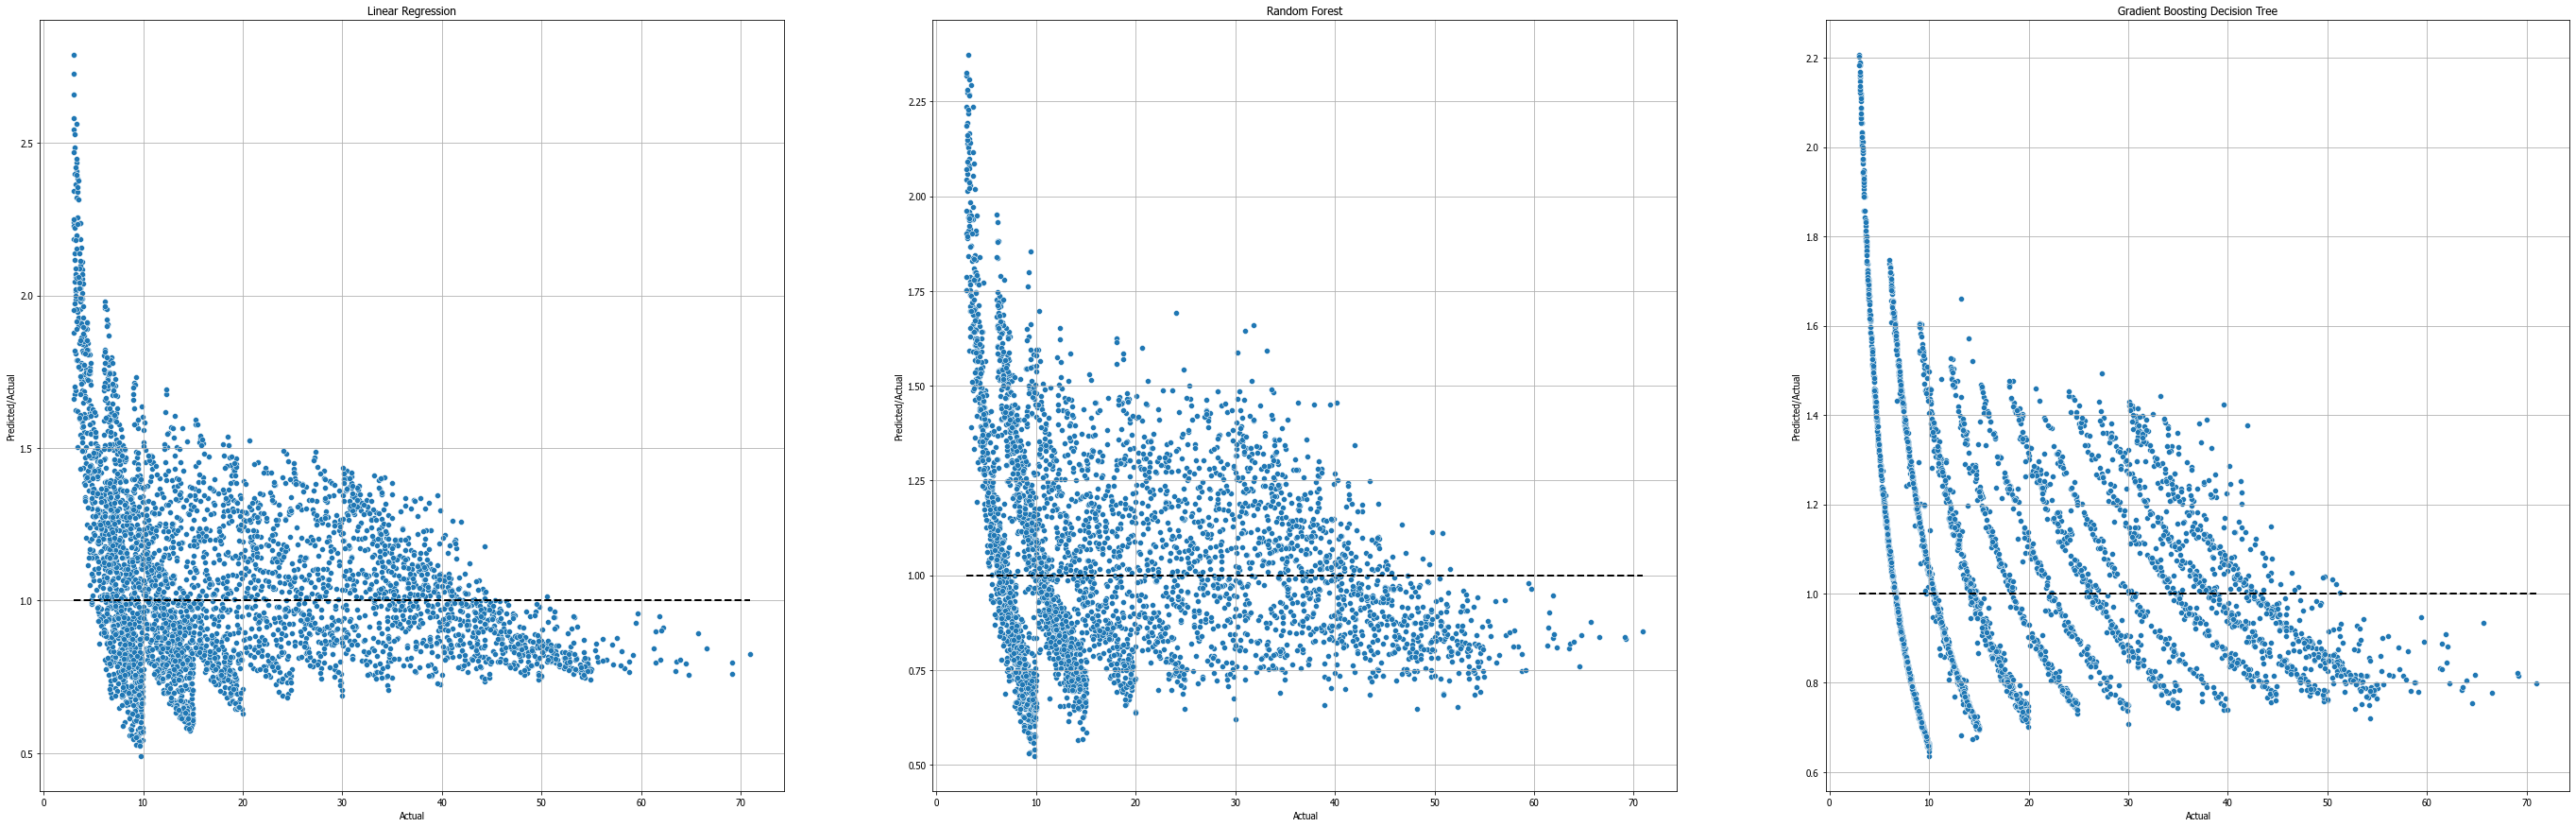

In [11]:
scatter_actual_proportion_subplots(
    data = model_pred_result_m,
    X = 'ym_test',
    ys = ['lr_predictions_m', 'rf_predictions_m', 'gbdt_predictions_m'],
    titles=['Linear Regression', 'Random Forest', 'Gradient Boosting Decision Tree'])

## 3.3 model error distribution

In [12]:
def error_distribution(data, X, y, title='Error Distribution', ylim=0.02, mean=True, median=True):
    data['error'] = data[y] - data[X]
    # hist, bins = np.histogram(data['error'], bins=100)
    plt.title(title)
    plt.xlabel('Error')
    maxErr = max(data['error'].max(), abs(data['error'].min()))
    maxDensity = ylim
    
    plt.xlim(-maxErr, maxErr)
    plt.ylim(0, maxDensity)
    sns.histplot(data['error'], bins=100, kde=True, stat="density", linewidth=0)
    if mean:
        plt.vlines(data['error'].mean(), 0, maxDensity, colors='green' , linestyles='solid', lw=1, label='Mean')
    if median:
        plt.vlines(data['error'].median(), 0, maxDensity, colors='red' , linestyles='solid', lw=1, label='Med')
    plt.legend()
    plt.show()

In [13]:
def error_distribution_subplots(data, X, ys, titles=None, ylim=0.02, mean=True, median=True, legend=False):
    plt.figure(figsize=(16*len(ys), 15))
    maxDensity = ylim
    maxErr = 0
    for i in range(len(ys)):
        y = ys[i]
        if titles is None:
            title = y
        else:
            title = titles[i]
        data['error'] = data[y] - data[X]
        maxErr = max( maxErr, max(data['error'].max(), abs(data['error'].min())) )
    
    for i in range(len(ys)):
        y = ys[i]
        if titles is None:
            title = y
        else:
            title = titles[i]
        plt.subplot(1, len(ys), i+1)
        data['error'] = data[y] - data[X]
        plt.title(title)
        plt.xlabel('Error')
        
        plt.xlim(-maxErr, maxErr)
        plt.ylim(0, maxDensity)
        sns.histplot(data['error'], bins=100, kde=True, stat="density", linewidth=0)
        if mean:
            plt.vlines(data['error'].mean(), 0, maxDensity, colors='green' , linestyles='solid', lw=1, label='Mean')
            plt.text(data['error'].mean()+maxErr*3/5, maxDensity*16/32, f'Mean = {data["error"].mean():.2f}', rotation=0, fontsize=20)
        if median:
            plt.vlines(data['error'].median(), 0, maxDensity, colors='red' , linestyles='solid', lw=1, label='Median')
            plt.text(data['error'].median()+maxErr*3/5, maxDensity*15/32, f'Median = {data["error"].median():.2f}', rotation=0, fontsize=20)
        if legend:
            plt.legend()
    plt.show()

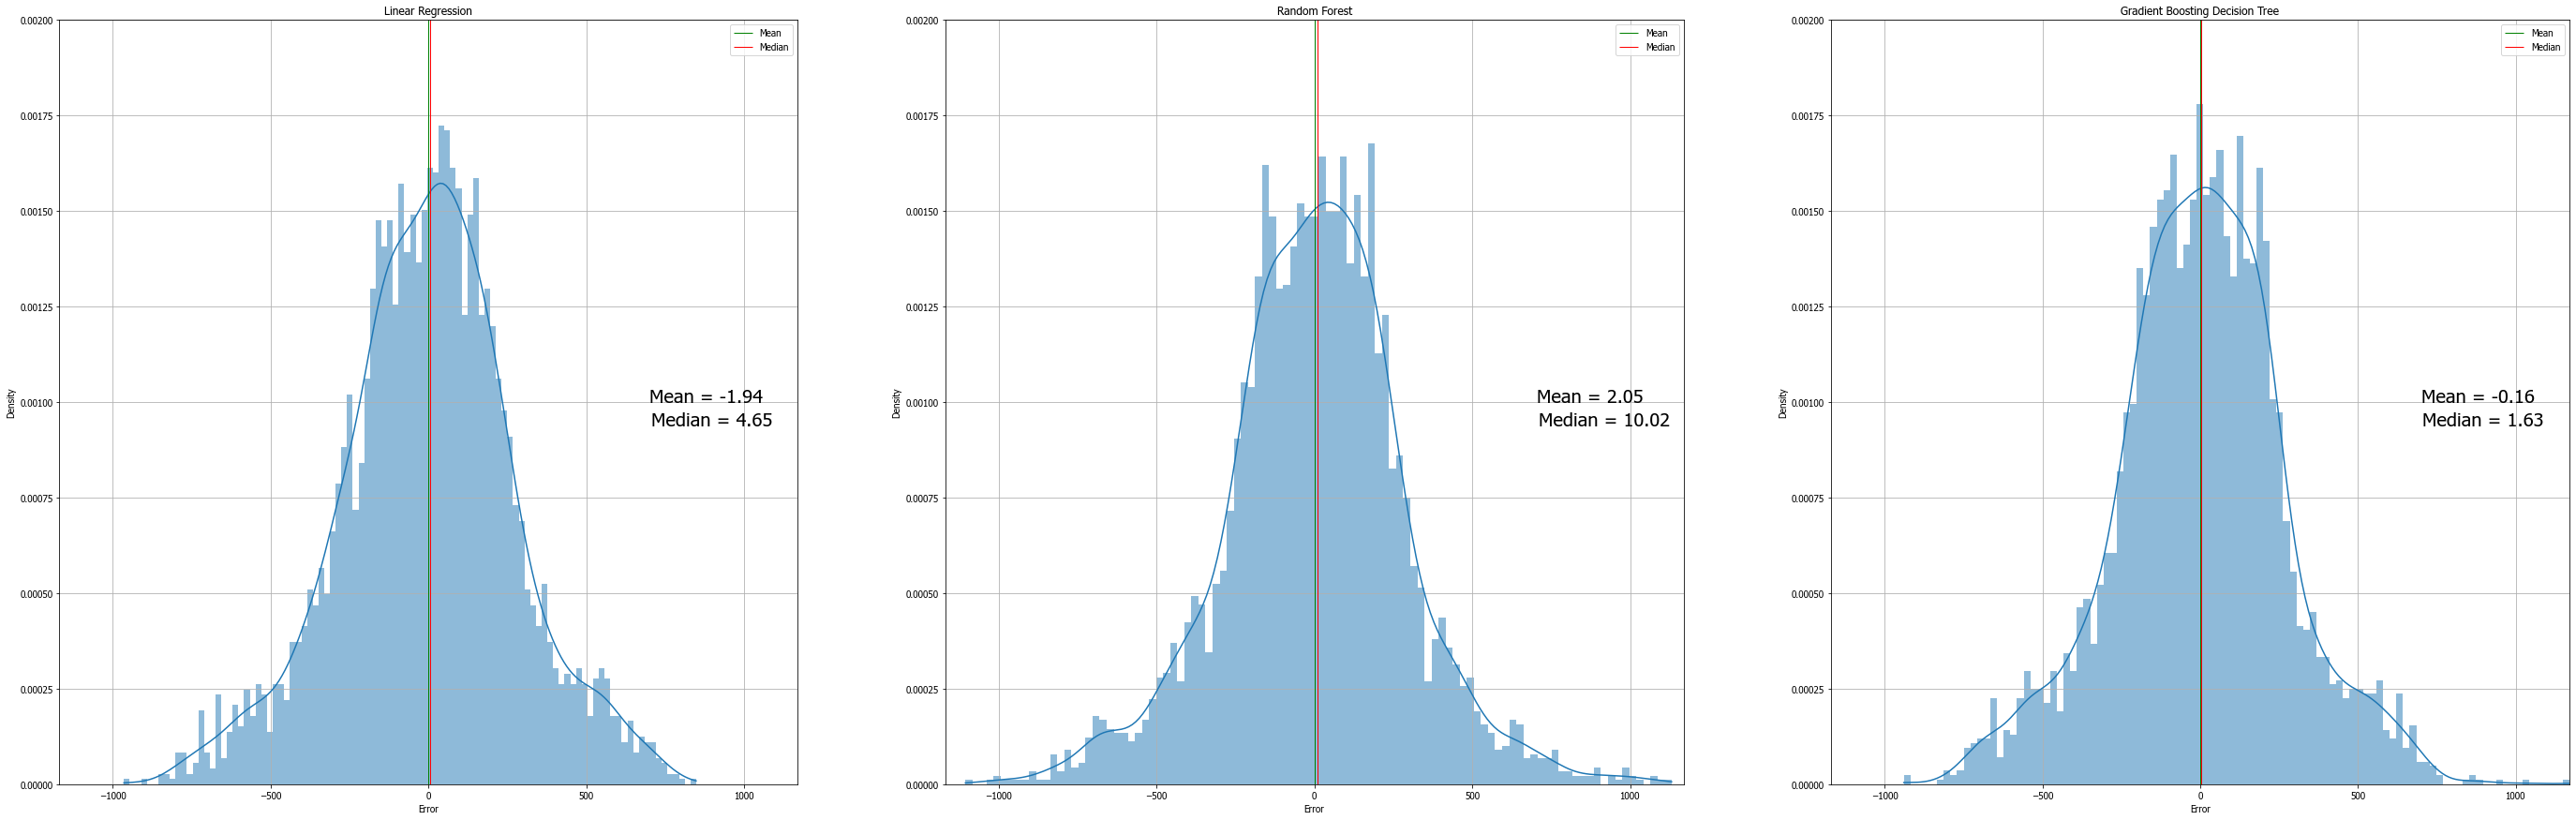

In [14]:
error_distribution_subplots(
    data = model_pred_result_s,
    X = 'ys_test',
    ys = ['lr_predictions_s', 'rf_predictions_s', 'gbdt_predictions_s'],
    ylim=0.002,
    titles=['Linear Regression', 'Random Forest', 'Gradient Boosting Decision Tree'],
    legend=True)

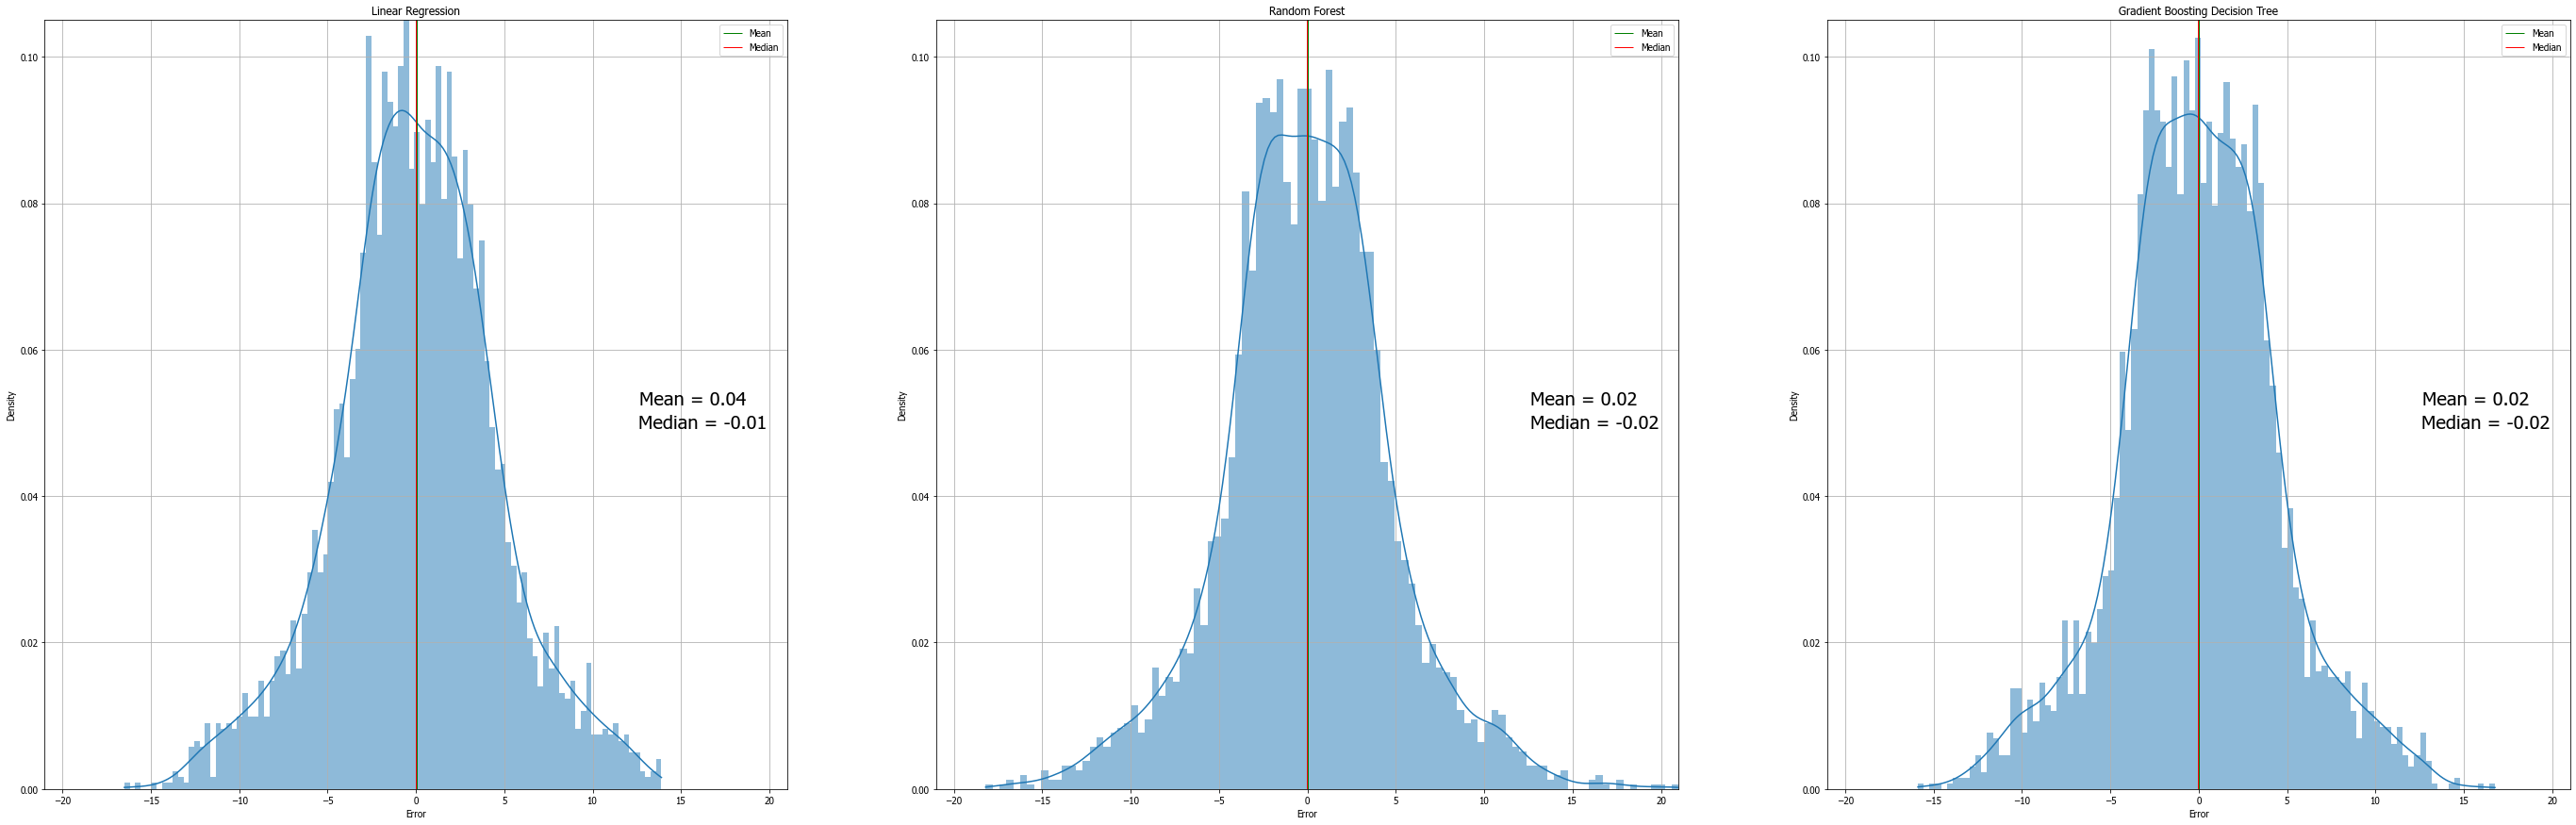

In [15]:
error_distribution_subplots(
    data = model_pred_result_m,
    X = 'ym_test',
    ys = ['lr_predictions_m', 'rf_predictions_m', 'gbdt_predictions_m'],
    ylim=0.105,
    titles=['Linear Regression', 'Random Forest', 'Gradient Boosting Decision Tree'],
    legend=True)

## 3.4 model metrics (lr, rf, gbt)

In [16]:
model_metrcis_s

Model         MAE           MSE        R2        RMSE
0  Linear Regression  212.612121  75281.645784  0.891858  274.375009
1      Random Forest  216.584621  80773.371460  0.883969  284.206565
2  Gradient Boosting  206.970008  71898.833882  0.896718  268.139579

In [17]:
model_metrcis_m

Model       MAE        MSE        R2      RMSE
0  Linear Regression  3.544697  21.015235  0.891485  4.584238
1      Random Forest  3.589620  22.272649  0.884992  4.719391
2  Gradient Boosting  3.446087  19.961956  0.896923  4.467881

## 3.5 hyperparam tuning heatmap

In [18]:
def heatmap(data, X, y, param_max_feature='1.0', scores='mean_test_neg_mean_absolute_error', title='Heatmap'):
    ext_data = data[data['param_max_features']==param_max_feature].drop(['param_max_features'], axis=1)
    heat = ext_data.pivot_table(index='param_n_estimators', columns='param_max_depth', values=scores)[::-1]
    plt.figure(figsize=(16, 15))
    plt.tight_layout()
    plt.title(title)
    sns.heatmap(heat, annot=True, fmt='.4f', cbar_kws={'label': scores})
    plt.show()

In [19]:
def heatmap_subplots(data, X, y, param_max_features=['1.0', 'log2', 'sqrt'], scores='mean_test_neg_mean_absolute_error', titles=['Heatmap']*3):
    fig, axes = plt.subplots(ncols=len(param_max_features), figsize=(16*len(param_max_features), 15))
    fig.tight_layout()
    for i, param_max_feature in enumerate(param_max_features):
        axes[i].set_title(titles[i])
        ext_data = data[data['param_max_features']==param_max_feature].drop(['param_max_features'], axis=1)
        heat = ext_data.pivot_table(index='param_n_estimators', columns='param_max_depth', values=scores)[::-1]
        min_pos = np.unravel_index(np.argmax(heat.values, axis=None), heat.values.shape)[::-1]
        sns.heatmap(heat, annot=True, fmt='.4f', ax=axes[i], cbar_kws={'label': scores})
        axes[i].axes.add_patch(plt.Rectangle((min_pos[0], min_pos[1], i), 1, 1, fc='none', ec='skyblue', lw=5, clip_on=False))
    plt.show()

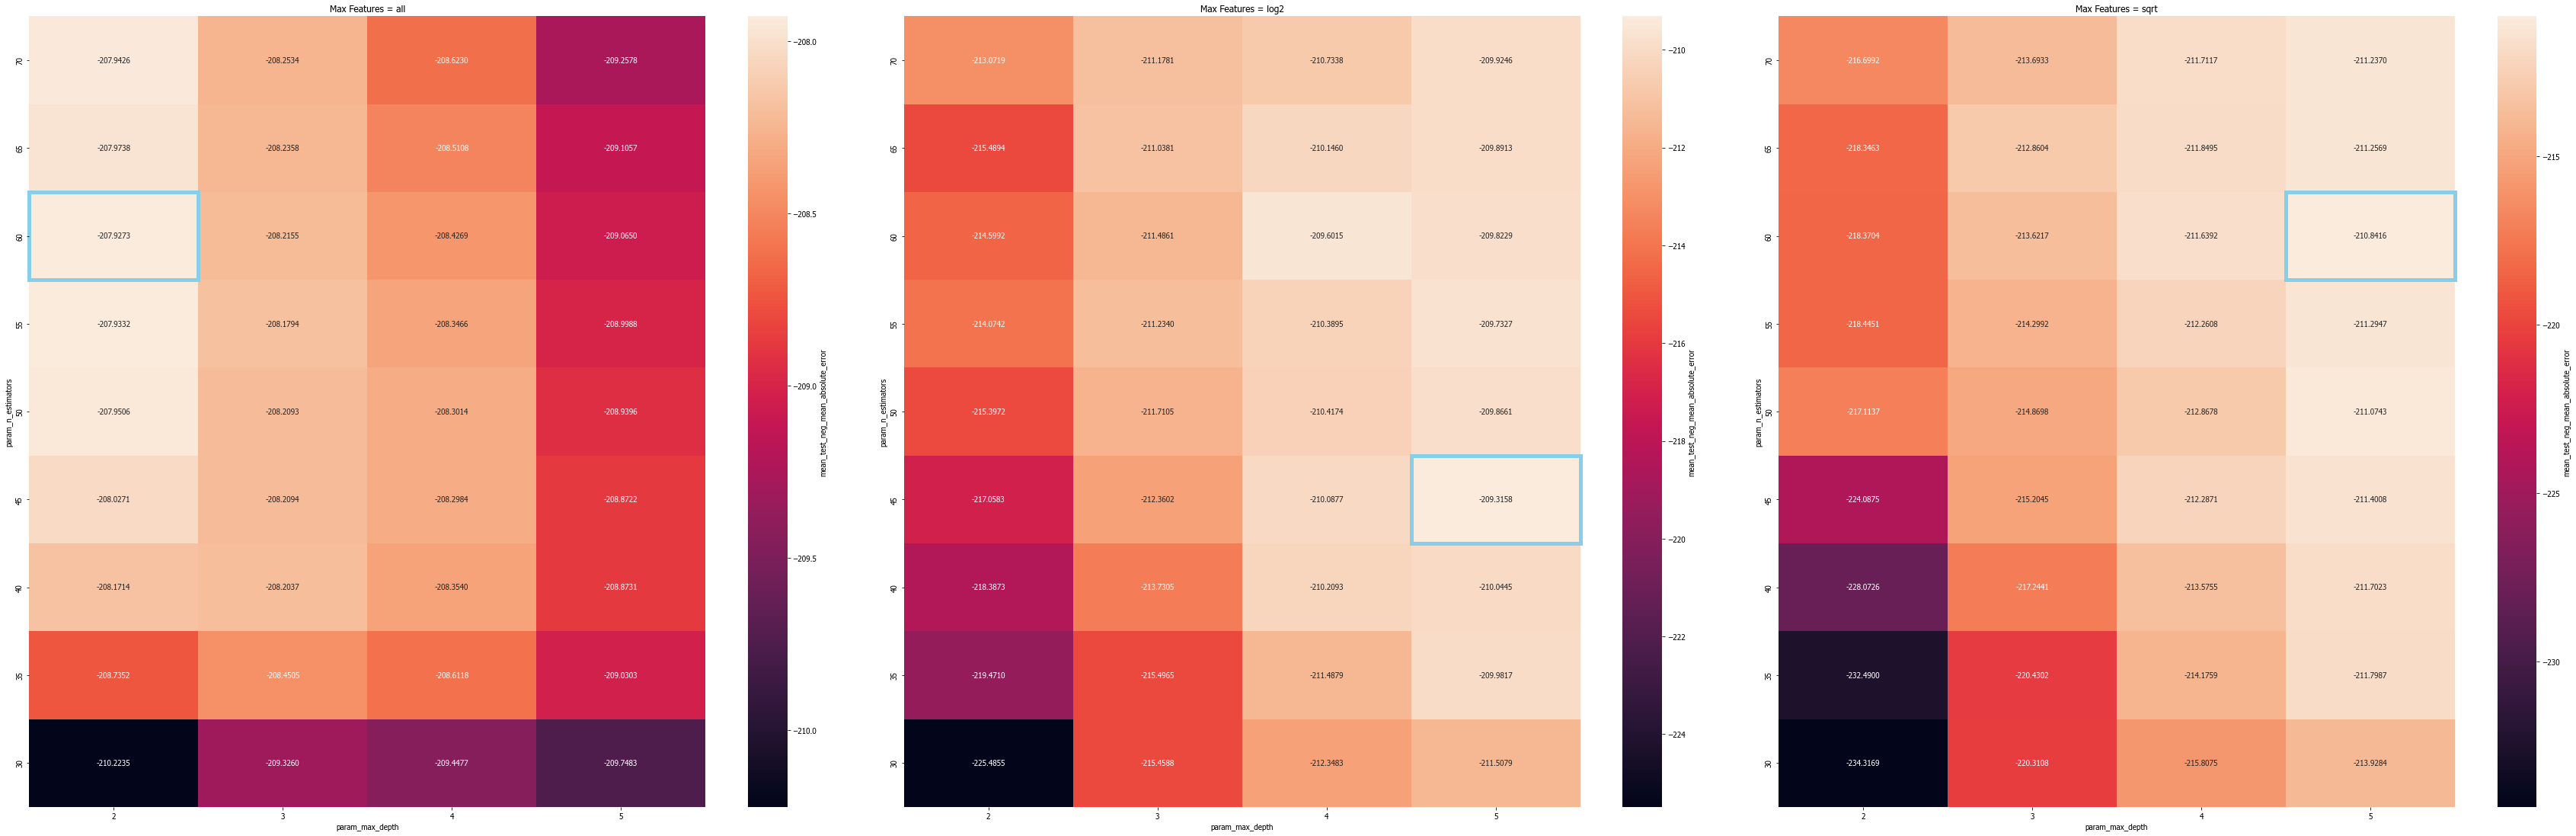

In [20]:
heatmap_subplots(
    data = CV_metrics_s, 
    X = 'param_max_depth',
    y = 'param_n_estimators',
    titles=['Max Features = all', 'Max Features = log2', 'Max Features = sqrt'])

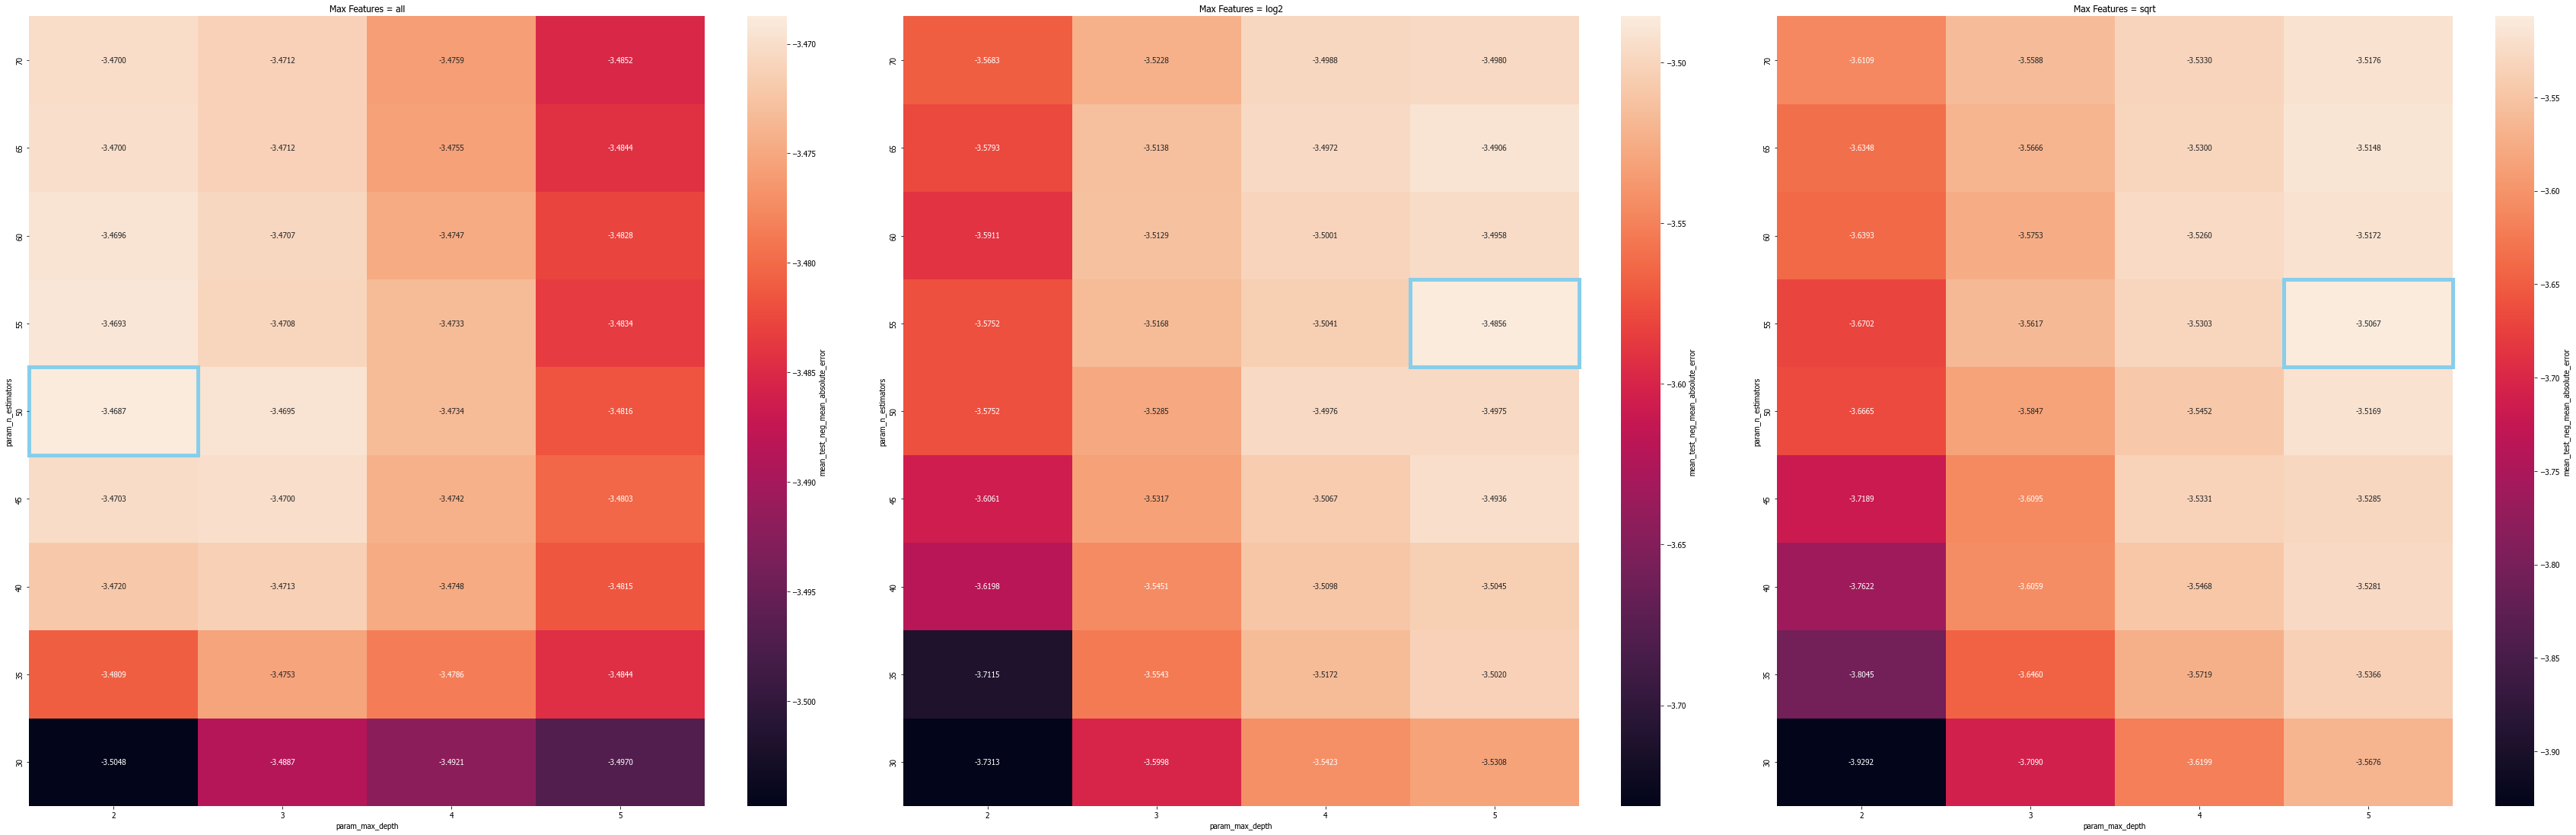

In [21]:
heatmap_subplots(
    data = CV_metrics_m,
    X = 'param_max_depth', 
    y = 'param_n_estimators',
    titles=['Max Features = all', 'Max Features = log2', 'Max Features = sqrt'])

## 3.6 best model result

### 3.6.1 As second

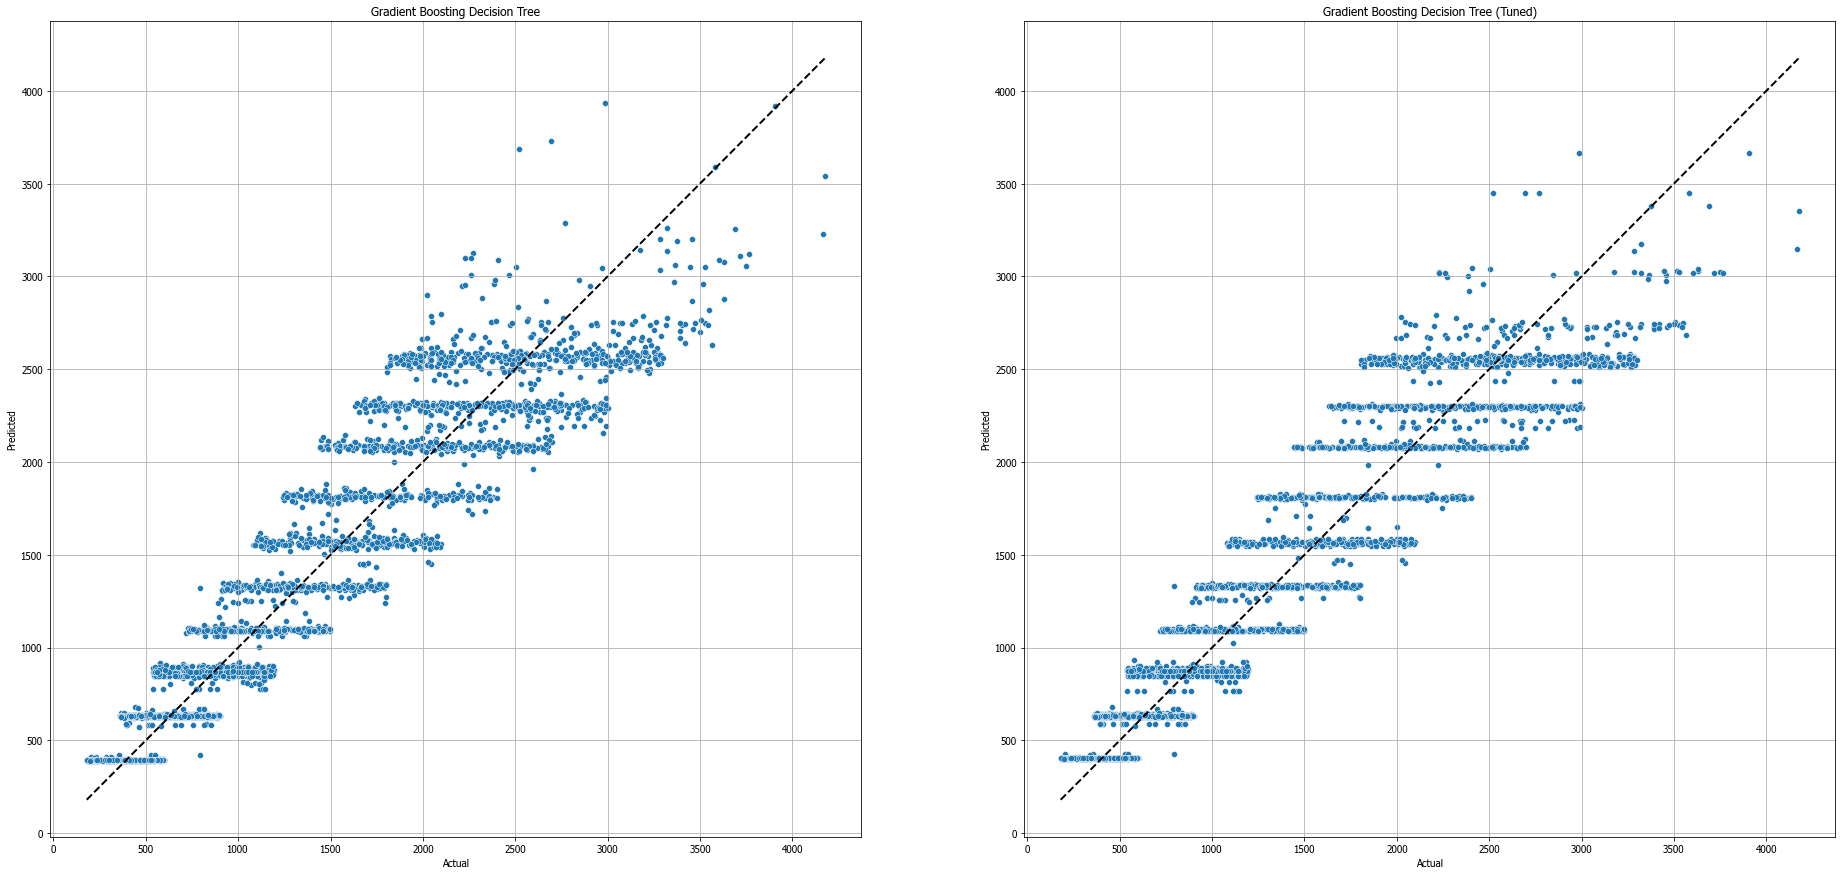

In [22]:
scatter_actual_predict_subplots(
    data=model_best_pred_result_s,
    X='ys_test',
    ys=['gbdt_s', 'gbdt_s (tuned)'],
    titles=['Gradient Boosting Decision Tree', 'Gradient Boosting Decision Tree (Tuned)'])

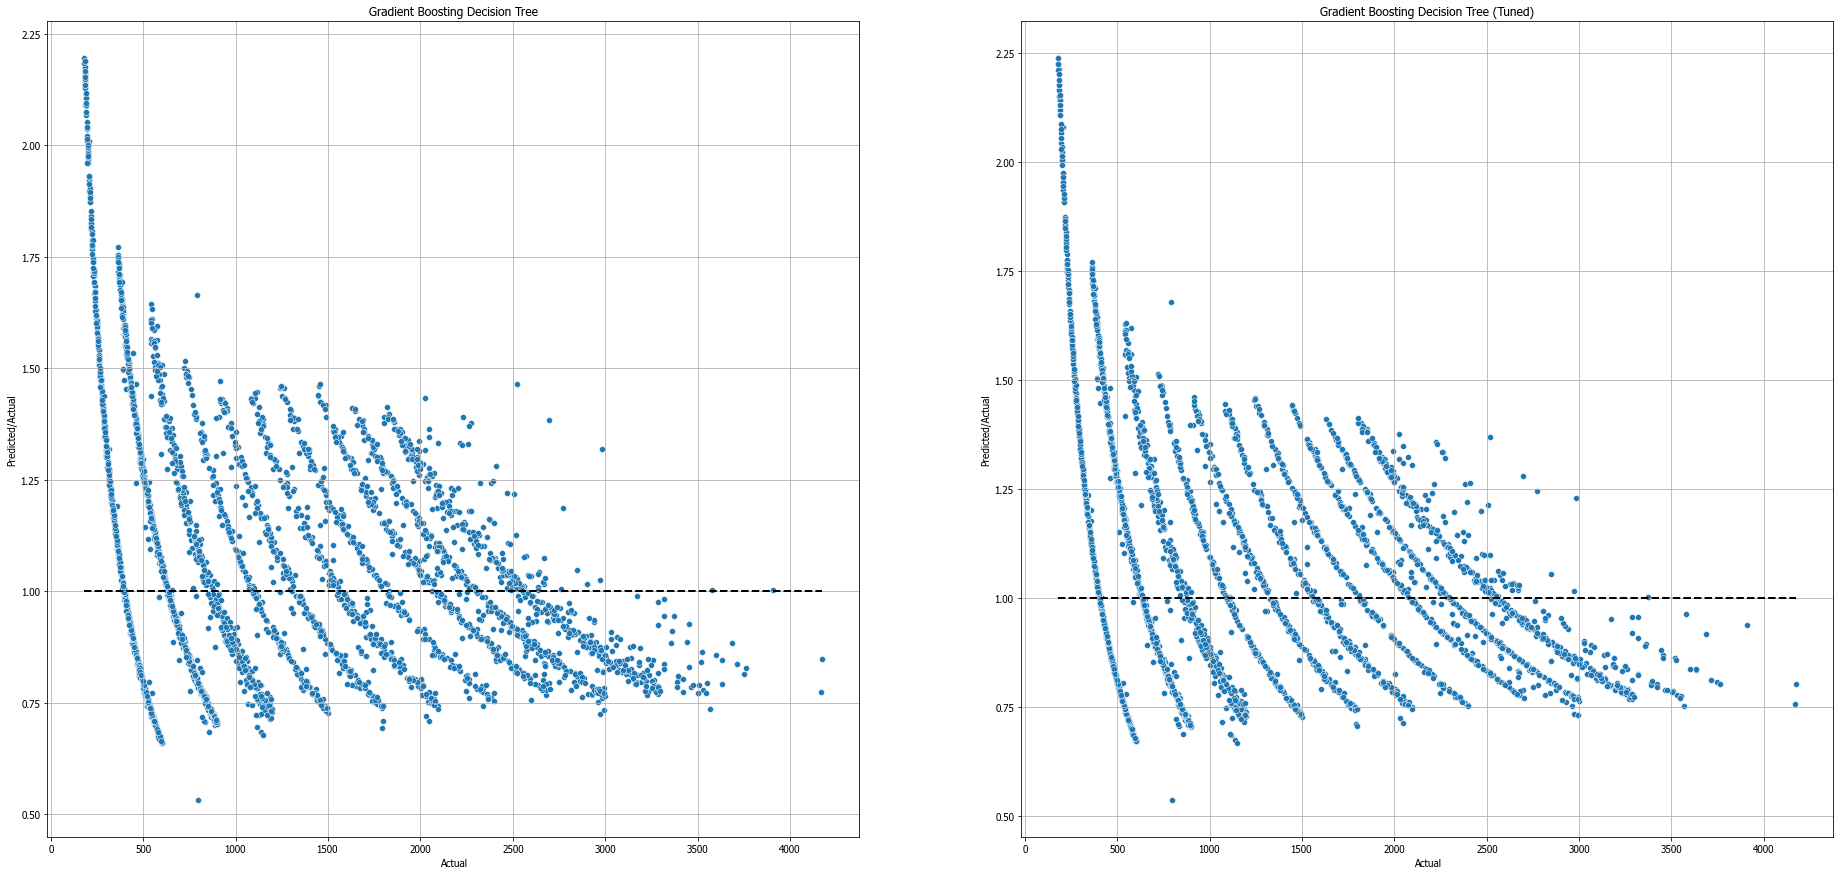

In [23]:
scatter_actual_proportion_subplots(
    data = model_best_pred_result_s,
    X = 'ys_test', 
    ys=['gbdt_s', 'gbdt_s (tuned)'],
    titles=['Gradient Boosting Decision Tree', 'Gradient Boosting Decision Tree (Tuned)'])

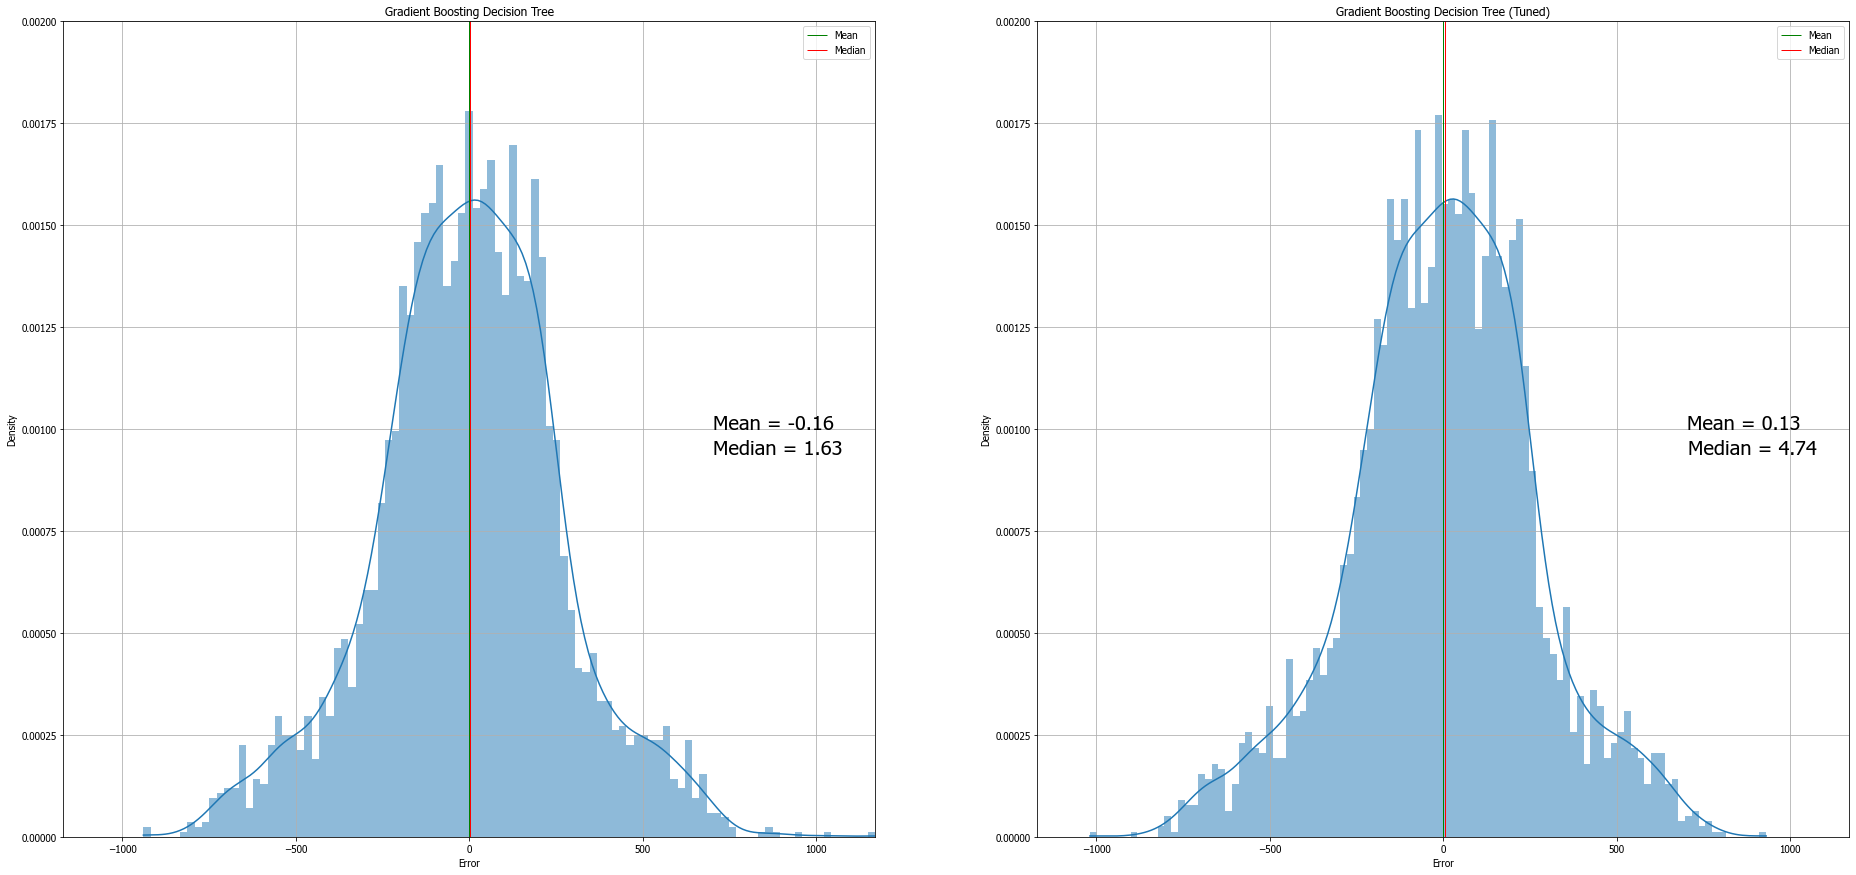

In [24]:
error_distribution_subplots(
    data = model_best_pred_result_s,
    X = 'ys_test', 
    ys=['gbdt_s', 'gbdt_s (tuned)'],
    titles=['Gradient Boosting Decision Tree', 'Gradient Boosting Decision Tree (Tuned)'],
    ylim=0.002,
    legend=True)

In [25]:
model_best_metrcis_s

Model         MAE           MSE        R2        RMSE
0          gbdt_s  206.970008  71898.833882  0.896718  268.139579
1  gbdt_s (tuned)  206.908905  71485.190125  0.897312  267.367145

### 3.6.2 As minute

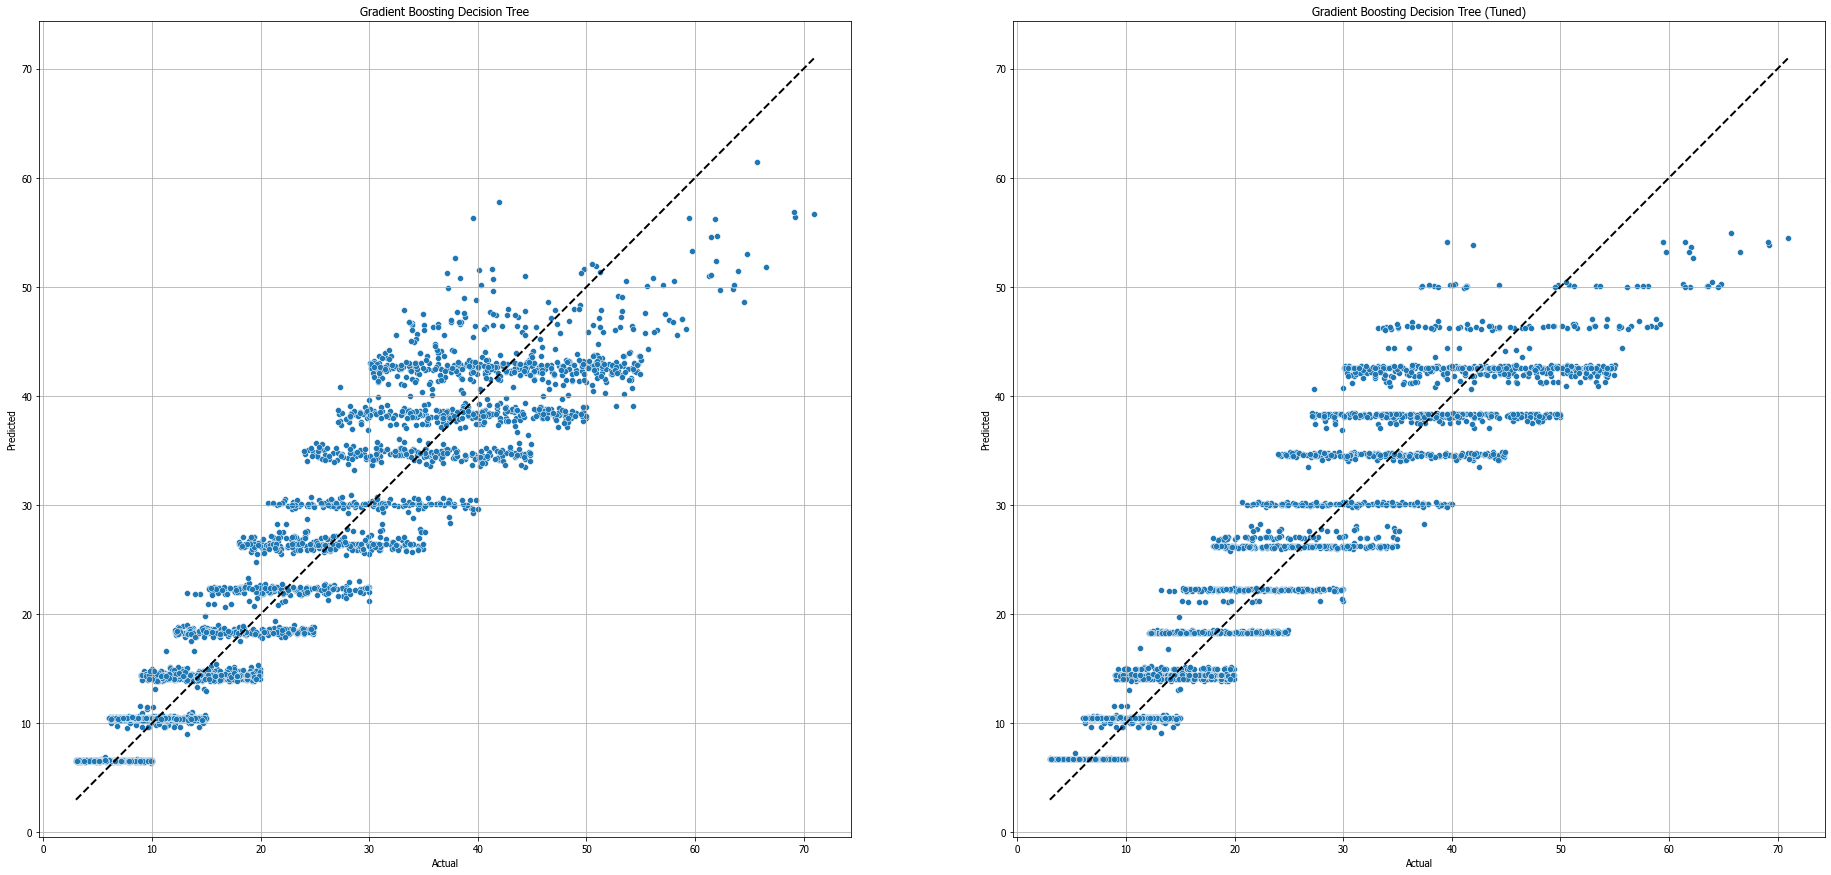

In [26]:
scatter_actual_predict_subplots(
    data = model_best_pred_result_m,
    X = 'ym_test',
    ys=['gbdt_m', 'gbdt_m (tuned)'],
    titles=['Gradient Boosting Decision Tree', 'Gradient Boosting Decision Tree (Tuned)'])

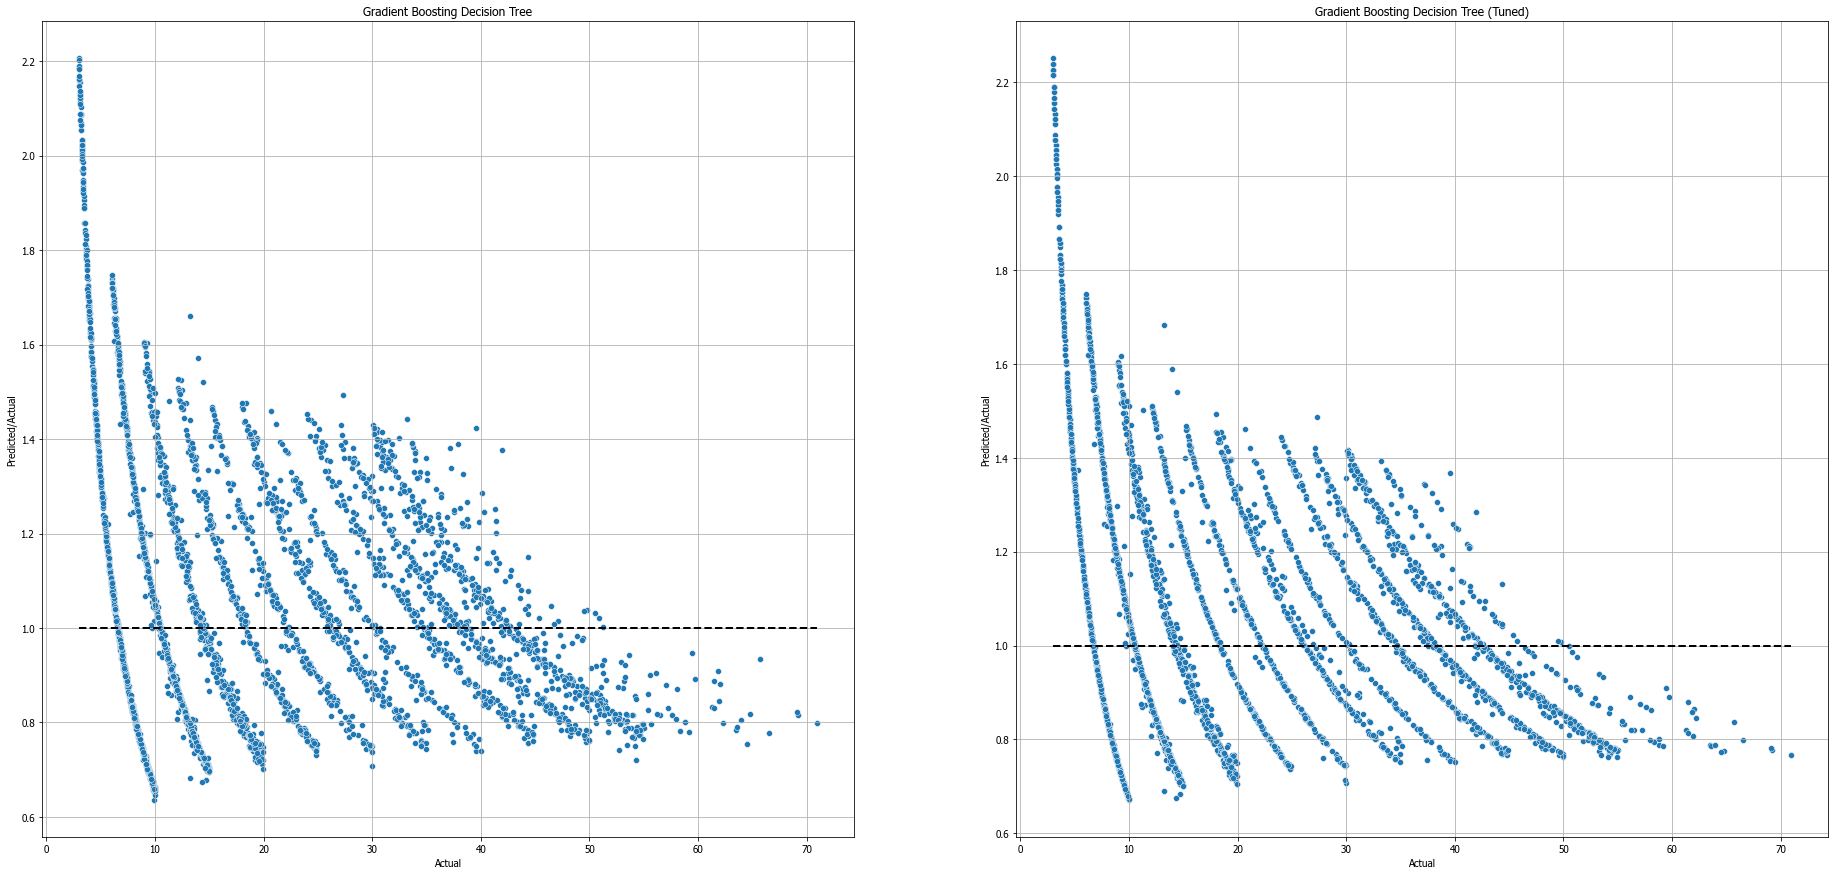

In [27]:
scatter_actual_proportion_subplots(
    data = model_best_pred_result_m,
    X = 'ym_test', 
    ys=['gbdt_m', 'gbdt_m (tuned)'],
    titles=['Gradient Boosting Decision Tree', 'Gradient Boosting Decision Tree (Tuned)'])

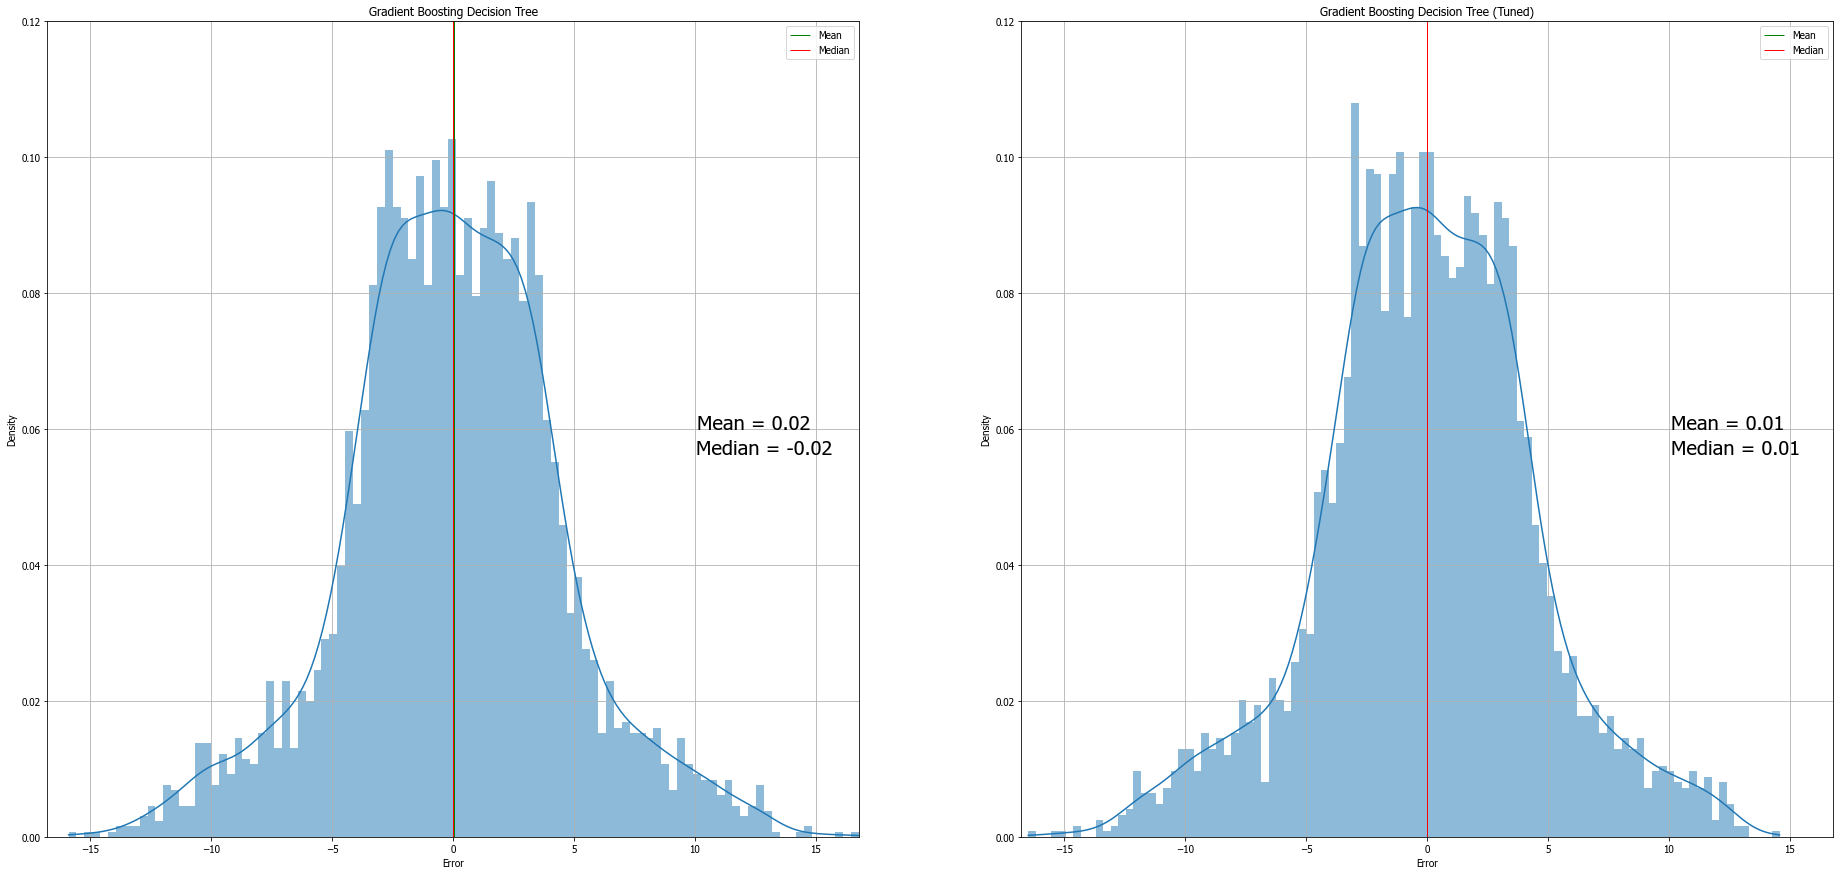

In [28]:
error_distribution_subplots(
    data = model_best_pred_result_m,
    X = 'ym_test', 
    ys=['gbdt_m', 'gbdt_m (tuned)'],
    titles=['Gradient Boosting Decision Tree', 'Gradient Boosting Decision Tree (Tuned)'],
    ylim=0.12,
    legend=True)

In [29]:
model_best_metrcis_m

Model       MAE        MSE        R2      RMSE
0          gbdt_m  3.446087  19.961956  0.896923  4.467881
1  gbdt_m (tuned)  3.437741  19.828949  0.897610  4.452971

## 3.7 model preformance (prediction time)

In [30]:
result_time = pd.read_csv('Food_delivery_best_model_prediction_time.csv')

In [31]:
def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

In [32]:
def plot_time_bar(data, title='Food Delivery Model Prediction Time', scale='linear'):
    plot_data = [np.log10(geo_mean(data[data_size])) for data_size in data.columns] if scale=='log' else [geo_mean(data[data_size]) for data_size in data.columns]
    # plot_data_std = [np.log10(np.std(data[data_size])) for data_size in data.columns] if scale=='log' else [np.std(data[data_size]) for data_size in data.columns]
    plt.figure(figsize=(10, 5))
    plt.tight_layout()
    plt.title(title)
    plt.bar(data.columns, plot_data)
    # plt.errorbar(data.columns, plot_data, yerr=plot_data_std, fmt='none', ecolor='red')
    plt.plot(data.columns, plot_data, color='red', marker='o')
    plt.xlabel('Data Size')
    if scale=='log':
        plt.ylabel('Log10 Time (s)')
    else:
        plt.ylabel('Time (s)')
    plt.show()

In [33]:
plt.rcParams['font.size'] = 10

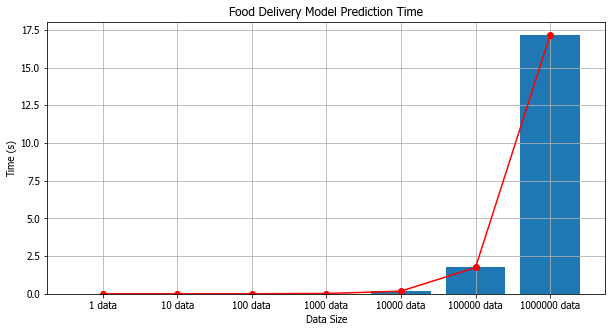

In [34]:
plot_time_bar(result_time, scale='linear')

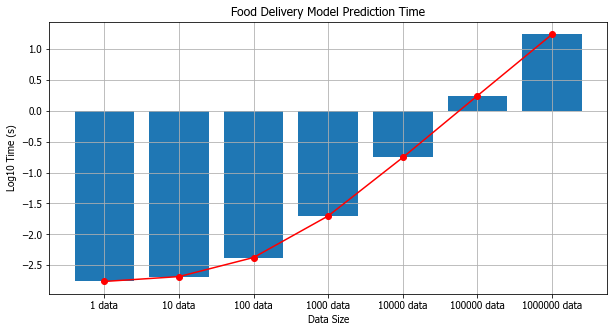

In [35]:
plot_time_bar(result_time, scale='log')

## 3.8 Error Distribution (group)

In [36]:
Xm_test = pd.read_csv('Food_delivery_test_set.csv')
model_best_pred_result_m = pd.read_csv('Food_delivery_best_model_prediction_result_m.csv')

model_best_pred_result_m = pd.concat([model_best_pred_result_m, Xm_test[['euc_dist', 'shortest_dist']]], axis=1)

In [37]:
model_best_pred_result_m

ym_test     gbdt_m  gbdt_m (tuned)     euc_dist  shortest_dist
0     43.150000  42.391091       42.750301  9690.064571      15272.418
1     13.966667  18.357028       18.305105  3064.595750       6015.885
2      4.316667   6.516412        6.716835   987.174539       4395.606
3     33.150000  34.564875       34.101449  7162.323117       7233.247
4      3.666667   6.588642        6.716835   718.519459       4304.869
...         ...        ...             ...          ...            ...
3995   4.633333   6.525425        6.716835   573.206967       1092.511
3996   5.150000   6.573331        6.716835   748.081374       1694.274
3997  21.333333  26.111749       26.179558  5196.843999       7021.465
3998  38.000000  34.894640       34.553574  7749.611512      10714.065
3999  30.983333  27.624975       27.721109  6013.082683       6990.743

[4000 rows x 5 columns]

In [38]:
def split_dataframe(df: pd.DataFrame, distances: list[float], by='euc_dist'):
    split_df = []
    for min_dis, max_dis in distances:
        split_df.append(df[(df[by] >= min_dis) & (df[by] < max_dis)])
    return split_df

In [39]:
model_best_pred_result_m_split = \
    split_dataframe(\
        df = model_best_pred_result_m, 
        distances = [(0, 5000), (5000, 10000), (10000, 999999)], 
        by='euc_dist')

In [40]:
def error_distribution_group(data: list, X, y, titles=None, ylim=0.02, mean=True, median=True, legend=False):
    plt.figure(figsize=(16*len(data), 15))
    maxDensity = ylim
    maxErr = 0
    
    for i in range(len(data)):
        data[i]['error'] = data[i][y] - data[i][X]
        maxErr = max( maxErr, max(data[i]['error'].max(), abs(data[i]['error'].min())) )
    
    for i in range(len(data)):
        df = data[i]
        if titles is None:
            title = y
        else:
            title = titles[i]
        plt.subplot(1, len(data), i+1)
        plt.title(title)
        plt.xlabel('Error')
        
        plt.xlim(-maxErr, maxErr)
        plt.ylim(0, maxDensity)
        sns.histplot(df['error'], bins=100, kde=True, stat="density", linewidth=0)
        if mean:
            plt.vlines(df['error'].mean(), 0, maxDensity, colors='green' , linestyles='solid', lw=1, label='Mean')
        if median:
            plt.vlines(df['error'].median(), 0, maxDensity, colors='red' , linestyles='solid', lw=1, label='Med')
        if legend:
            plt.legend()
    plt.show()

In [41]:
plt.rcParams['font.size'] = 26

C:\Users\PoraRee\AppData\Local\Temp/ipykernel_15356/1423279954.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]['error'] = data[i][y] - data[i][X]
C:\Users\PoraRee\AppData\Local\Temp/ipykernel_15356/1423279954.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]['error'] = data[i][y] - data[i][X]
C:\Users\PoraRee\AppData\Local\Temp/ipykernel_15356/1423279954.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

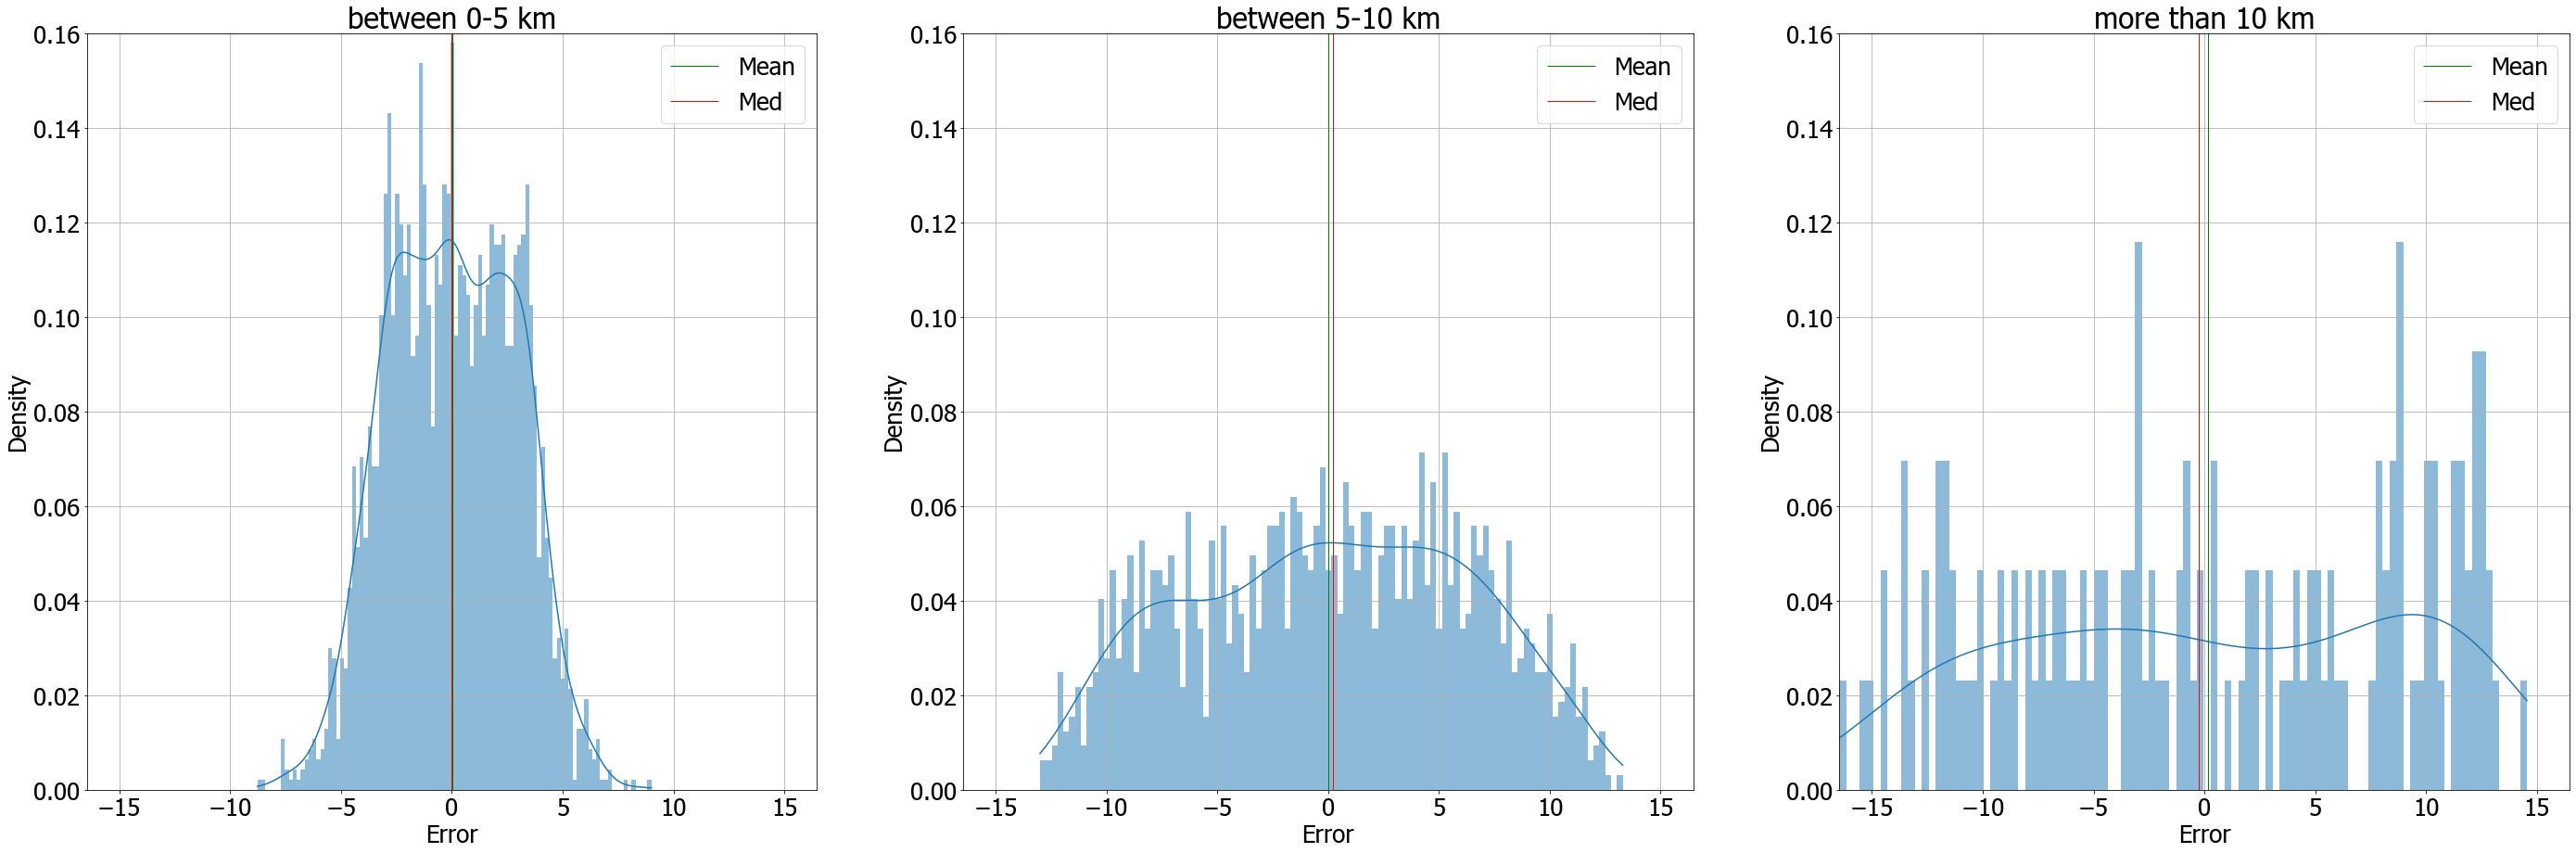

In [42]:
error_distribution_group(
    data=model_best_pred_result_m_split,
    X='ym_test',
    y='gbdt_m (tuned)',
    titles=['between 0-5 km', 'between 5-10 km', 'more than 10 km'],
    ylim=0.16, mean=True, median=True, legend=True)

In [43]:
def scatter_actual_predict_group(data: list, X, y, titles=None):
    plt.figure(figsize=(16*len(data), 15))
    
    for i in range(len(data)):
        df = data[i]
        if titles is None:
            title = y
        else:
            title = titles[i]
        plt.subplot(1, len(data), i+1)
        plt.title(title)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.plot([df[X].min(), df[X].max()], [df[X].min(), df[X].max()], 'k--', lw=2)
        
        sns.scatterplot(x=df[X], y=df[y], data=df)
    plt.show()

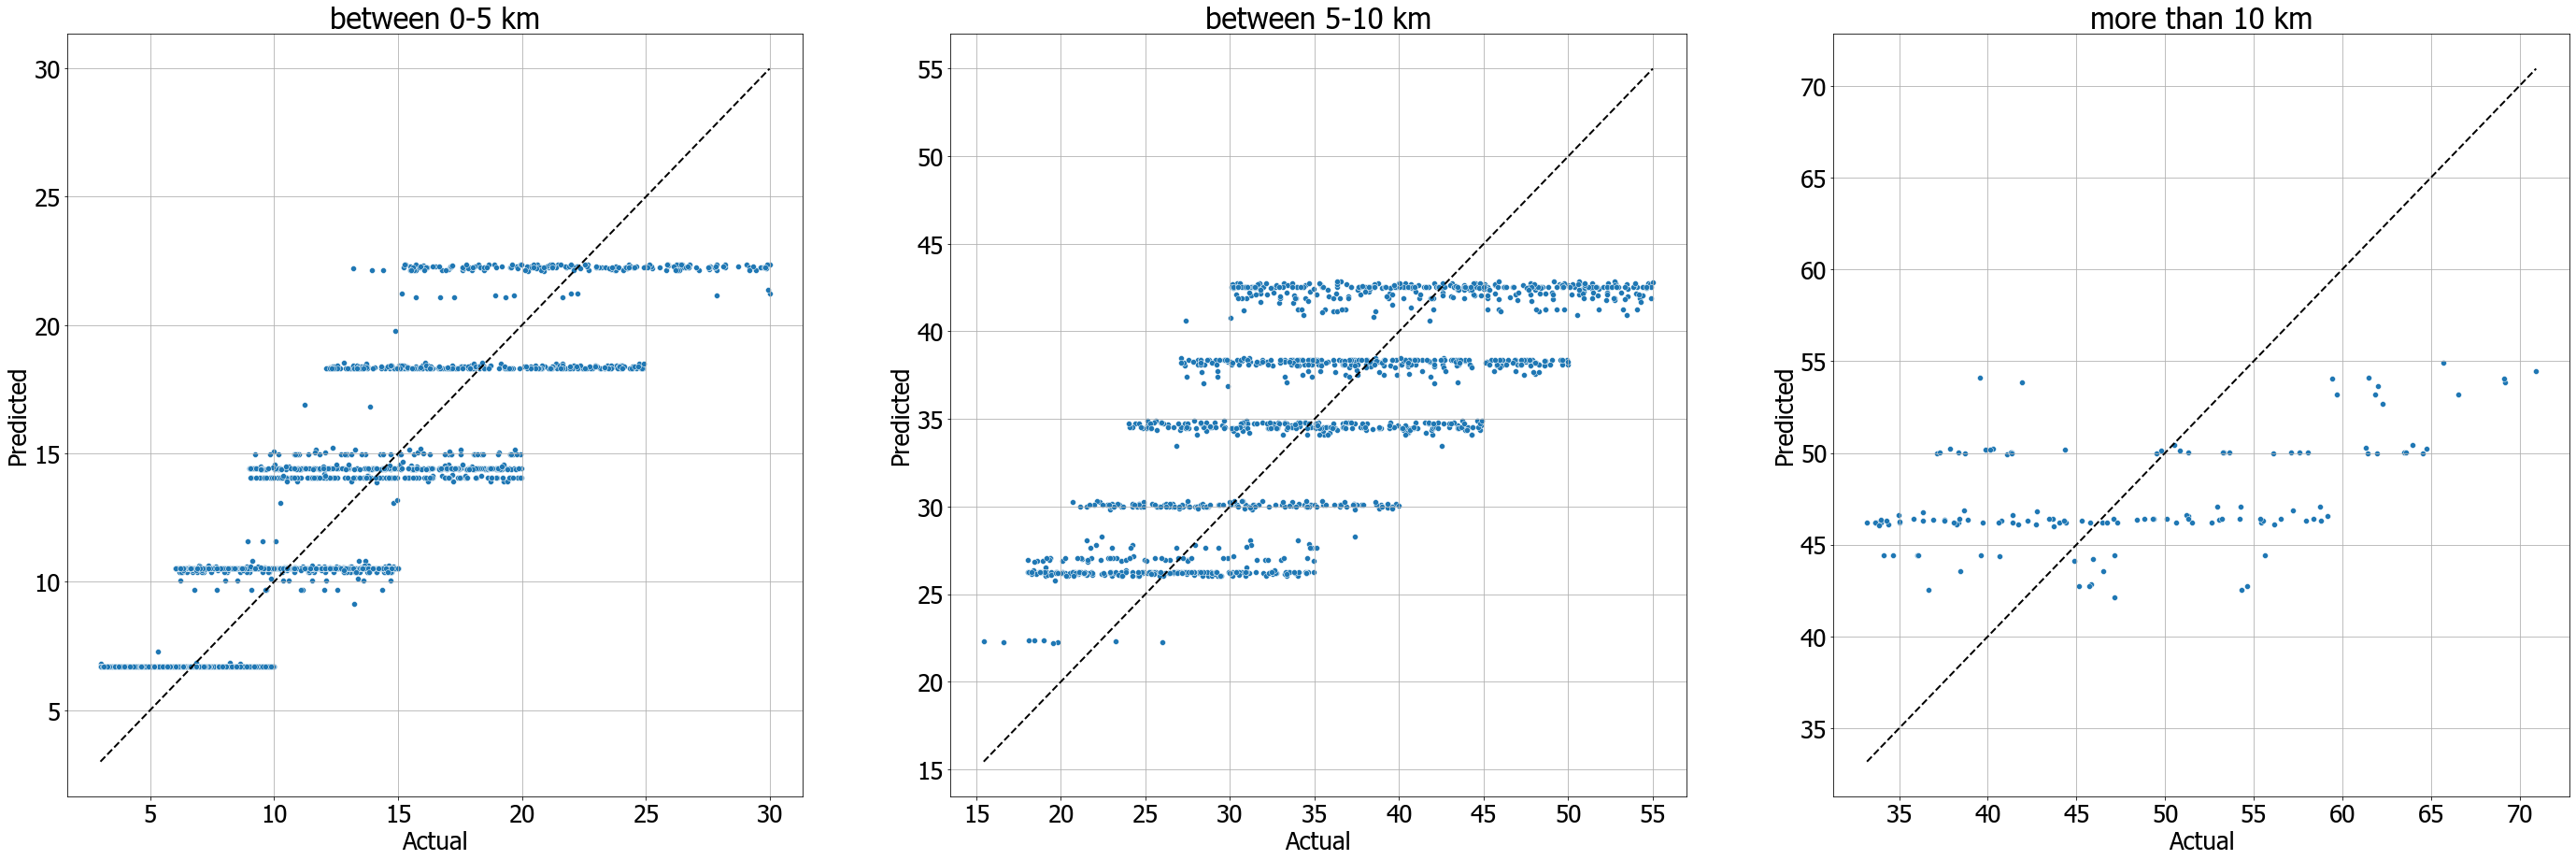

In [44]:
scatter_actual_predict_group(
    data=model_best_pred_result_m_split,
    X='ym_test',
    y='gbdt_m (tuned)',
    titles=['between 0-5 km', 'between 5-10 km', 'more than 10 km'])

In [47]:
(model_best_pred_result_m_split[0]['error']**2).mean()

7.962039584127003

In [48]:
(model_best_pred_result_m_split[1]['error']**2).mean()

38.99567669402117

In [49]:
(model_best_pred_result_m_split[2]['error']**2).mean()

75.5114335297532